Data set from https://www.kaggle.com/datasets/joebeachcapital/differentiated-thyroid-cancer-recurrence/data

# **Setting up Environment**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import logit
from scipy.stats import fisher_exact
from statsmodels.stats.contingency_tables import Table
le = LabelEncoder()

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

sns.set(style='whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# **Loading the Dataset**

In [4]:
file_path = 'Thyroid_Diff.csv'
thyroid_data = pd.read_csv(file_path)

print(f'Dataset shape: {thyroid_data.shape}')
thyroid_data.head()

Dataset shape: (383, 17)


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


# **Understanding the Dataset**

In [5]:
print("Column names:")
print(thyroid_data.columns.tolist())

print("Data types:")
thyroid_data.dtypes

Column names:
['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']
Data types:


,0
Age,int64
Gender,object
Smoking,object
Hx Smoking,object
Hx Radiothreapy,object
Thyroid Function,object
Physical Examination,object
Adenopathy,object
Pathology,object
Focality,object


Features Description:
1. Age: Age of the patient
2. Gender: Gender of the patient
3. Smoking: Current status as smoker or not
4. Hx Smoking: History of smoking
5. Hx Radiotherapy: History of prior radiotherapy
6. Thyroid Function: The condition of the disease on tyroid function
7. Physical Examination: Where the tyroid nodule growth or goiter is
8. Adenopathy: Lymph node involvement
9. Pathology: Type of tyroid cancer
10. Focality: Tumor focality
11. Risk: Cancer risk classification
12. T: Tumor classification
13. N: Lymph Node classification
14. M: Metastasis classification
15. Stage: Cancer staging
16. Response: Patient's response to treatment
17. Recurred: Whether or not cancer recurred



In [6]:
thyroid_data.describe(include='all')

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383.000000,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,NaN,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,NaN,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,NaN,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275
mean,40.866841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,15.134494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning & Preprocessing**

In [7]:
print("Missing values per column:")
thyroid_data.isnull().sum()

Missing values per column:


,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [8]:
print("\nCorrecting misspelled column name: 'Hx Radiothreapy' to 'Hx Radiotherapy'\n")
thyroid_data.rename(columns={'Hx Radiothreapy': 'Hx Radiotherapy'}, inplace=True)
print("Corrected column names:")
print(thyroid_data.columns.tolist())


Correcting misspelled column name: 'Hx Radiothreapy' to 'Hx Radiotherapy'

Corrected column names:
['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiotherapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']


In [9]:
categorical_columns = thyroid_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f"Unique values in {column}:{thyroid_data[column].value_counts()}")

Unique values in Gender:Gender
F    312
M     71
Name: count, dtype: int64
Unique values in Smoking:Smoking
No     334
Yes     49
Name: count, dtype: int64
Unique values in Hx Smoking:Hx Smoking
No     355
Yes     28
Name: count, dtype: int64
Unique values in Hx Radiotherapy:Hx Radiotherapy
No     376
Yes      7
Name: count, dtype: int64
Unique values in Thyroid Function:Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64
Unique values in Physical Examination:Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64
Unique values in Adenopathy:Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: c

From this, we can see that there is a significant difference in terms of gender. There are 312 females compared to only 71 males. This aligns well with common knowledge that thyroid cancer is more common in females.

We also that there is a low amount of smokers and a low amount of people with a history of smoking. This means that most people in this dataset to be non-smokers.

In terms of people with a history of prior radiotherapy, there are only 7 people within the entire dataset meaning that it is a very rare risk factor in our dataset.

Most of the patients in this dataset are euthyroid, meaning normal thyroid function. The most common kind of dysfunction is Clinical Hyperthyroidism.

Both Multinodular goiter and Single nodular goiter-right are the most common in these patients followed by Single nodular goiter-left. Only very few, 7 patients, had a normal examination findings.

Most of the patients had no adenopathy, or lymph node involvement. When there was involvement, right-side adenopathy was the most common.

Papillary thyroid cancer is the most common type in this dataset followed by micropapillary. This seems to reflects the general distribution of thyroid cancer types in the population.

Most tumors are unifocal (247 patients) rather than multifocal (136 patients).

TNM-Stages show that T2 classification tumors, no lymph node invovement, and metastases level M0 were the most common in these patients. The monst common characteristics are thus: The tumor is within the thyroid between 2cm-4cm, cancer hasn't spread to to nearby lymph nodes, and cancer hasn't spread to other parts of the body.

The most common overall stage is Stage I indicating that most are early stage disease.

Most patients are classified as low risk (249) with fewer intermediate (102) and high risk (32) cases.

208 patients had an excellent response, while 91 had structural incomplete response.

108 patients experienced recurrence, while 275 did not. This finding is incredibly significant and important to this research.

---
Overall, the data looks clean with no inconsistencies in terms of missing data. The only error I noticed was a mispelling of the column name for the history of radiotherapy which was a quick renaming fix. As for the data itself, I will have to keep in mind the massive difference in factors like gender as well as radiotherapy when I am interpreting results.

Additional Help: https://www.cancerresearchuk.org/about-cancer/thyroid-cancer/stages-types/tnm-staging#:~:text=Metastases%20(M),as%20the%20lungs%20or%20bones.


# **Exploring the Dataset**

**Age Distribution**

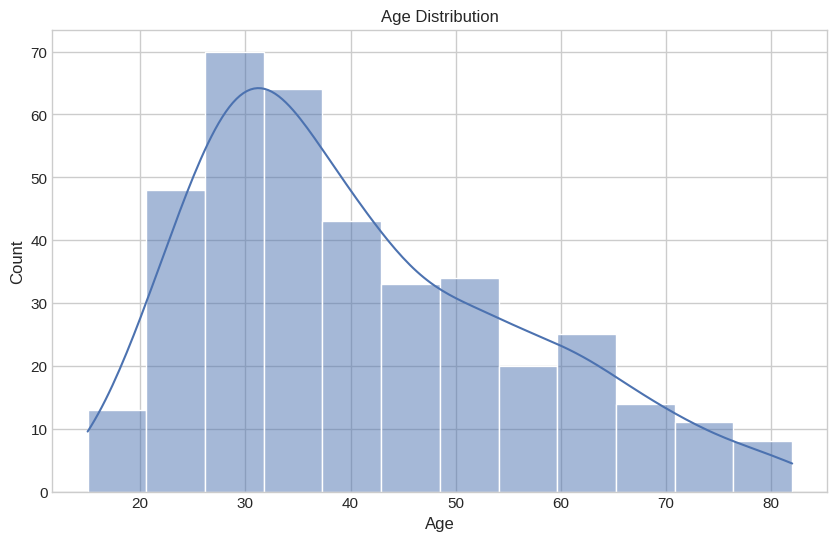

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(thyroid_data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Gender Distribution**

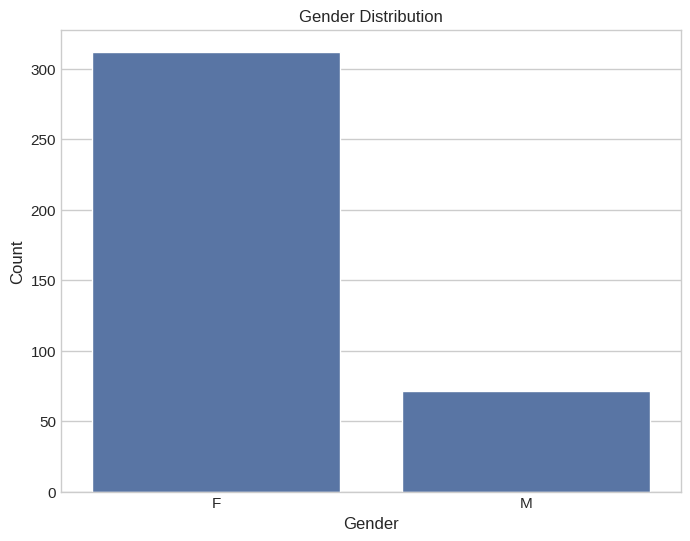

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=thyroid_data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Age & Gender Distribution**

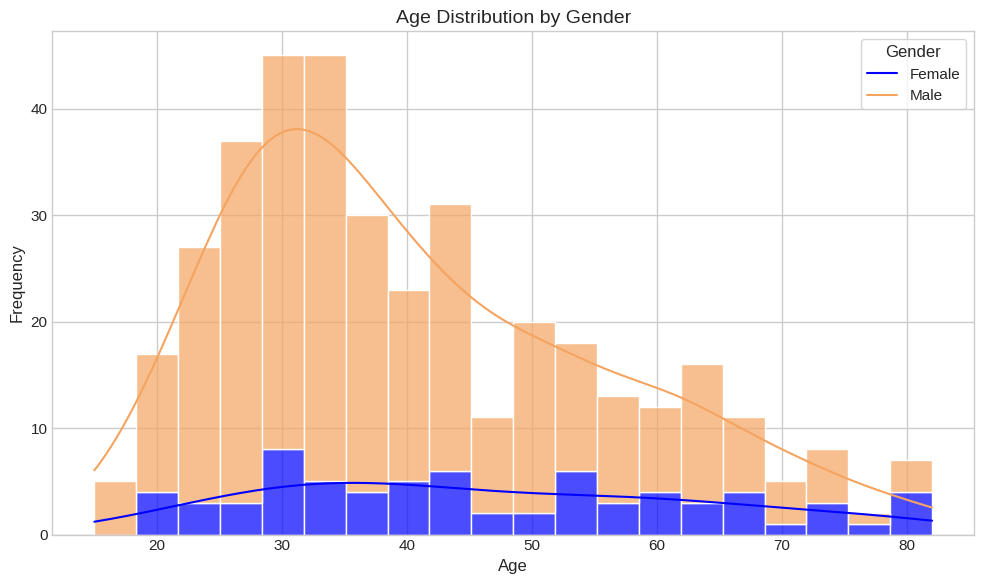

In [12]:

plt.figure(figsize=(10, 6))

ax = sns.histplot(data=thyroid_data, x='Age', hue='Gender',
                 multiple='stack', kde=True,
                 palette={'M': 'blue', 'F': 'sandybrown'},
                 alpha=0.7, bins=20)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution by Gender', fontsize=14)
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'], frameon=True)
plt.tight_layout()
plt.show()

**Pathology Distribution**

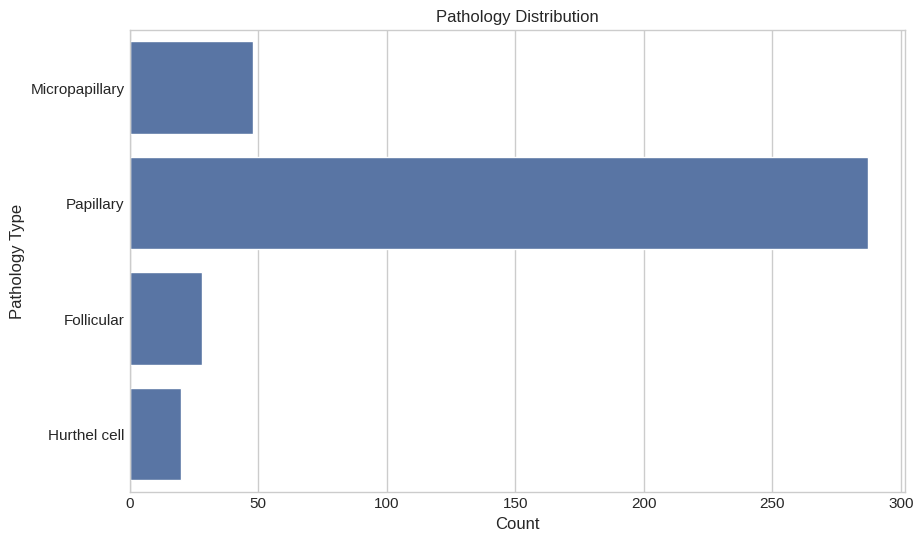

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Pathology', data=thyroid_data)
plt.title('Pathology Distribution')
plt.xlabel('Count')
plt.ylabel('Pathology Type')
plt.show()

**Risk & Pathology Bar Chart**

<Figure size 1200x800 with 0 Axes>

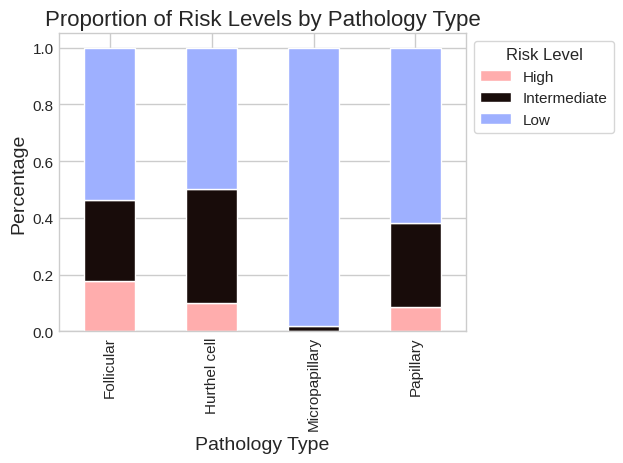

In [14]:
risk_path = pd.crosstab(thyroid_data['Pathology'], thyroid_data['Risk'], normalize='index')

plt.figure(figsize=(12, 8))
risk_path.plot(kind='bar', stacked=True, colormap='berlin_r')

plt.title('Proportion of Risk Levels by Pathology Type', fontsize=16)
plt.xlabel('Pathology Type', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Risk Level', loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
plt.tight_layout()
plt.show()

**Risk Distribution**

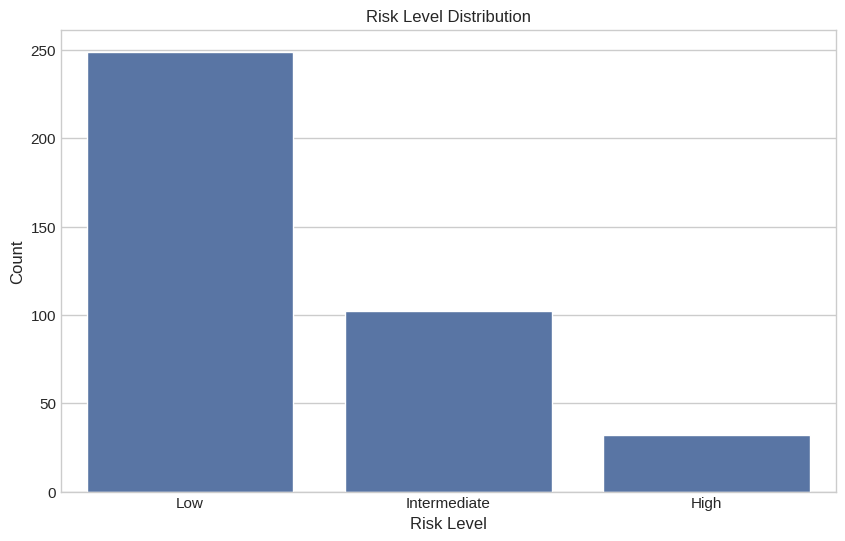

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk', data=thyroid_data)
plt.title('Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

**Age & Risk Distribution**

/tmp/ipython-input-2224281222.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Risk', y='Age', data=thyroid_data,


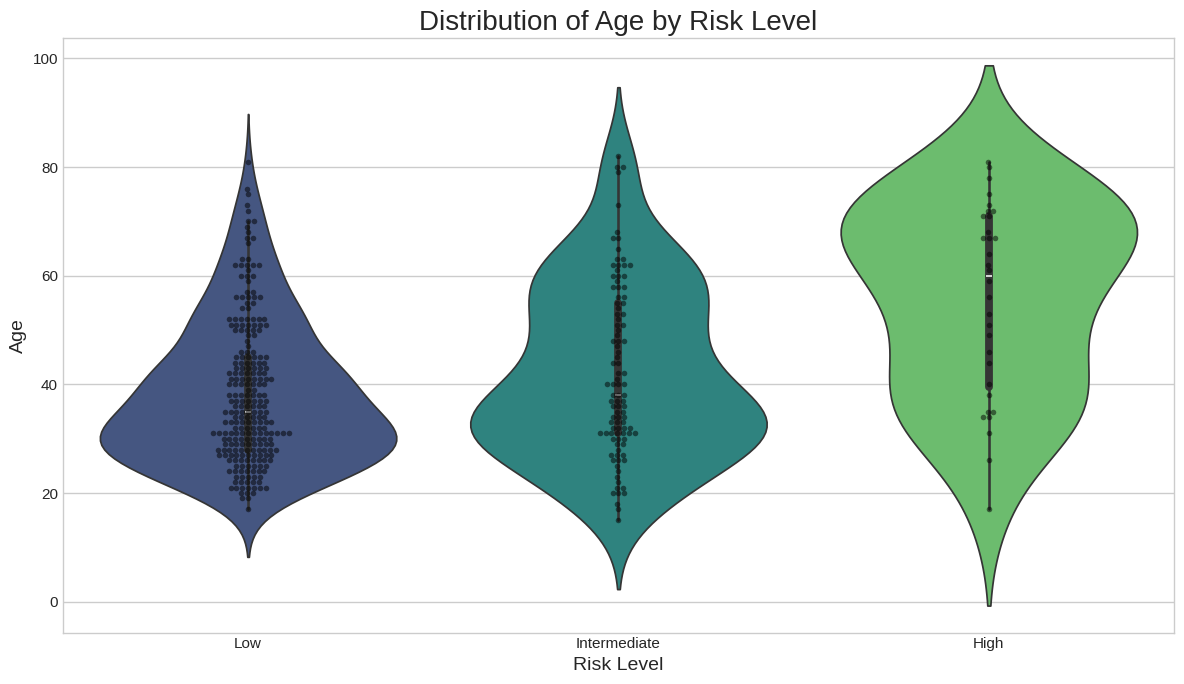

In [16]:
plt.figure(figsize=(12, 7))

sns.violinplot(x='Risk', y='Age', data=thyroid_data,
                   palette='viridis', inner='box')

sns.swarmplot(x='Risk', y='Age', data=thyroid_data,
             color='black', alpha=0.5, size=4)

plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Distribution of Age by Risk Level', fontsize=20)
plt.tight_layout()
plt.show()

**Recurrence Distribution**

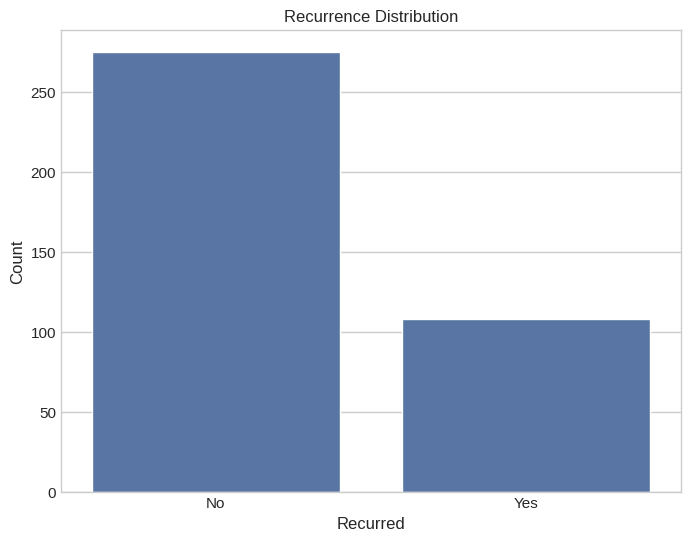

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Recurred', data=thyroid_data)
plt.title('Recurrence Distribution')
plt.xlabel('Recurred')
plt.ylabel('Count')
plt.show()

**Smoking Distribution**

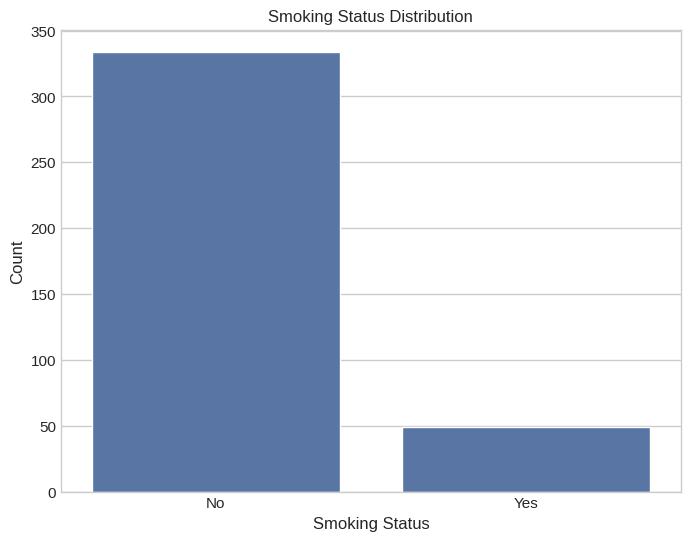

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', data=thyroid_data)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

**History of Smoking Distribution**

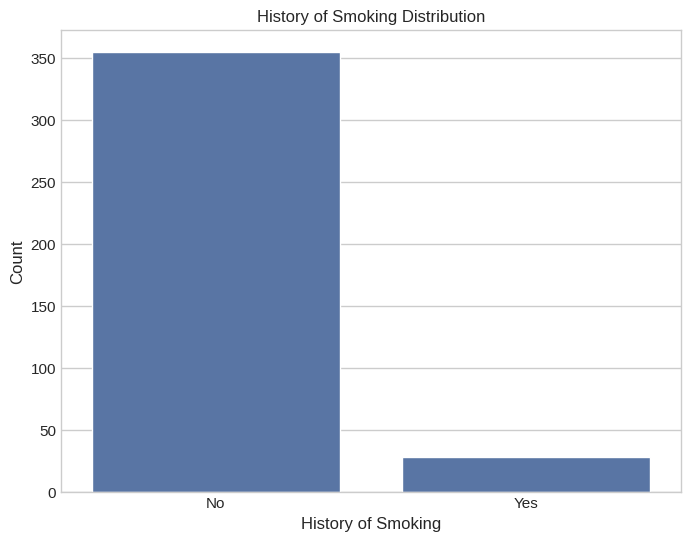

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Hx Smoking', data=thyroid_data)
plt.title('History of Smoking Distribution')
plt.xlabel('History of Smoking')
plt.ylabel('Count')
plt.show()

**History of Smoking and Risk Bar Chart**

<Figure size 1200x800 with 0 Axes>

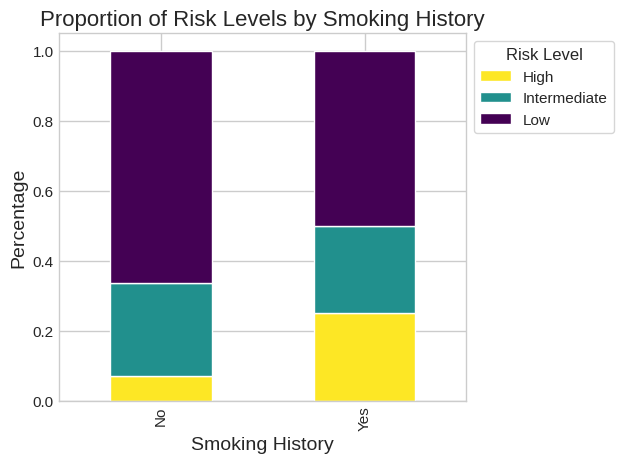

In [20]:
smoking_risk = pd.crosstab(thyroid_data['Hx Smoking'], thyroid_data['Risk'], normalize='index')

plt.figure(figsize=(12, 8))
smoking_risk.plot(kind='bar', stacked=True, colormap='viridis_r')

plt.title('Proportion of Risk Levels by Smoking History', fontsize=16)
plt.xlabel('Smoking History', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.legend(title='Risk Level', loc='upper left', bbox_to_anchor=(1, 1), frameon=True)
plt.tight_layout()
plt.show()

**History of Radiotherapy**

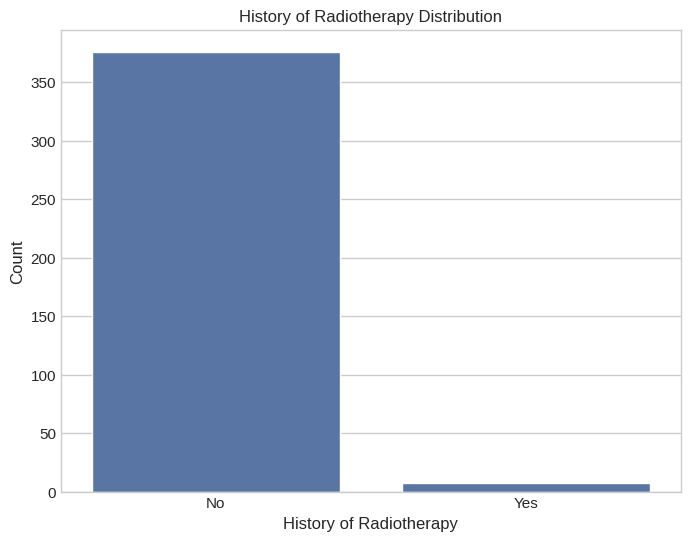

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Hx Radiotherapy', data=thyroid_data)
plt.title('History of Radiotherapy Distribution')
plt.xlabel('History of Radiotherapy')
plt.ylabel('Count')
plt.show()

**Thyroid Function Distribution**

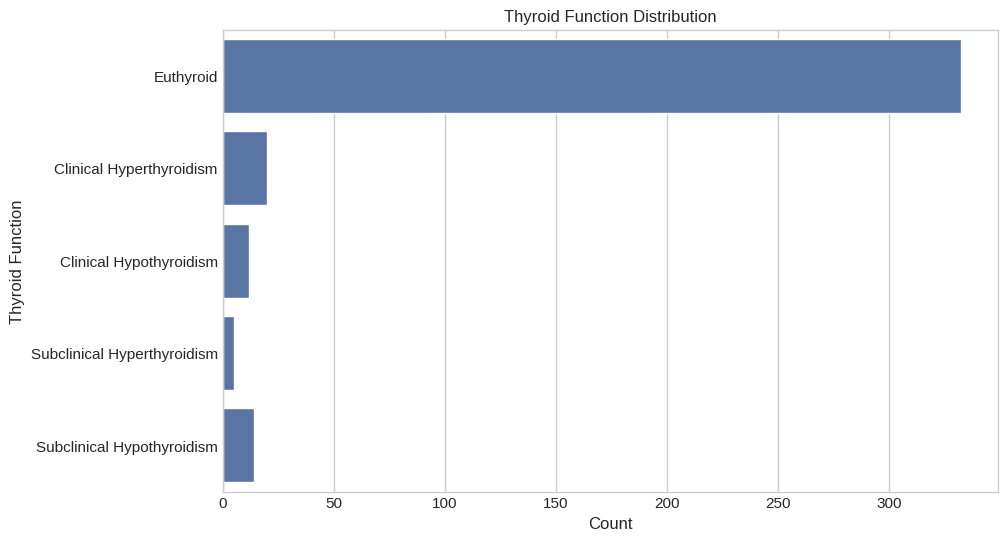

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Thyroid Function', data=thyroid_data)
plt.title('Thyroid Function Distribution')
plt.xlabel('Count')
plt.ylabel('Thyroid Function')
plt.show()

**Thyroid Function & Risk Graph**

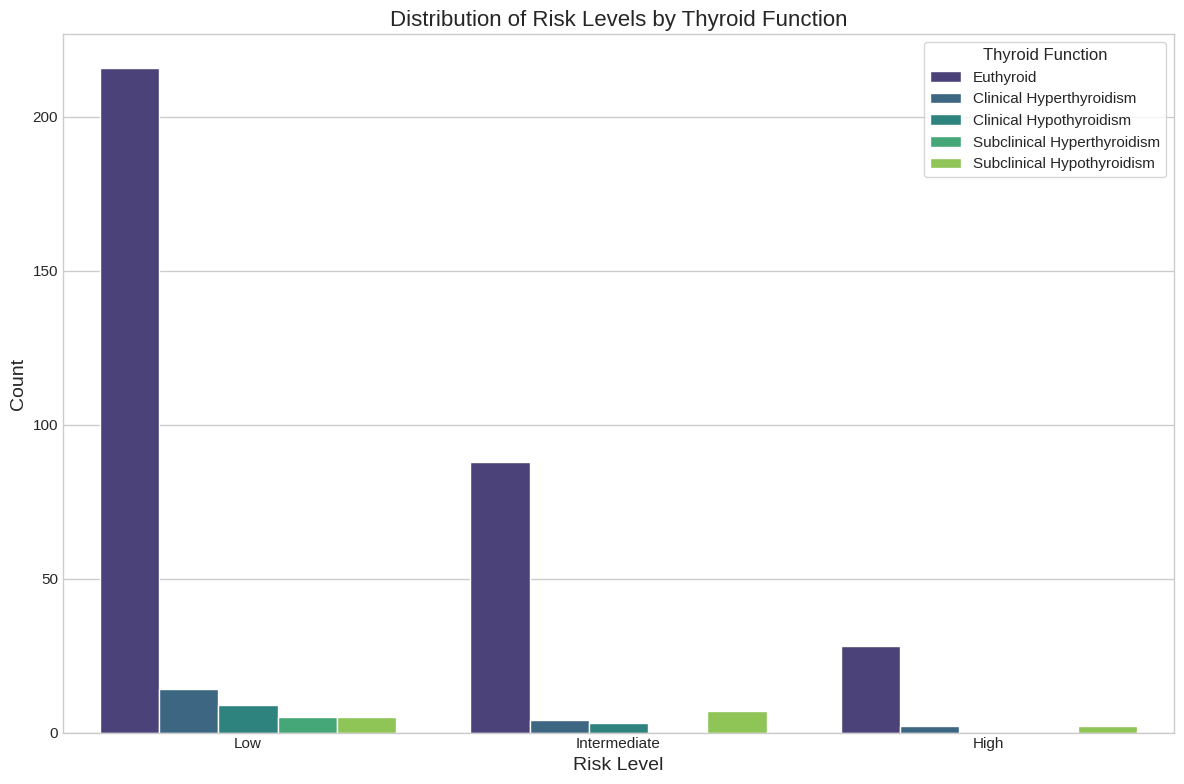

In [23]:
plt.figure(figsize=(12, 8))

sns.countplot(data=thyroid_data, x='Risk', hue='Thyroid Function', palette='viridis')

plt.title('Distribution of Risk Levels by Thyroid Function', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Thyroid Function', title_fontsize=12, frameon=True)
plt.tight_layout()
plt.show()

**Physical Examination Distribution**

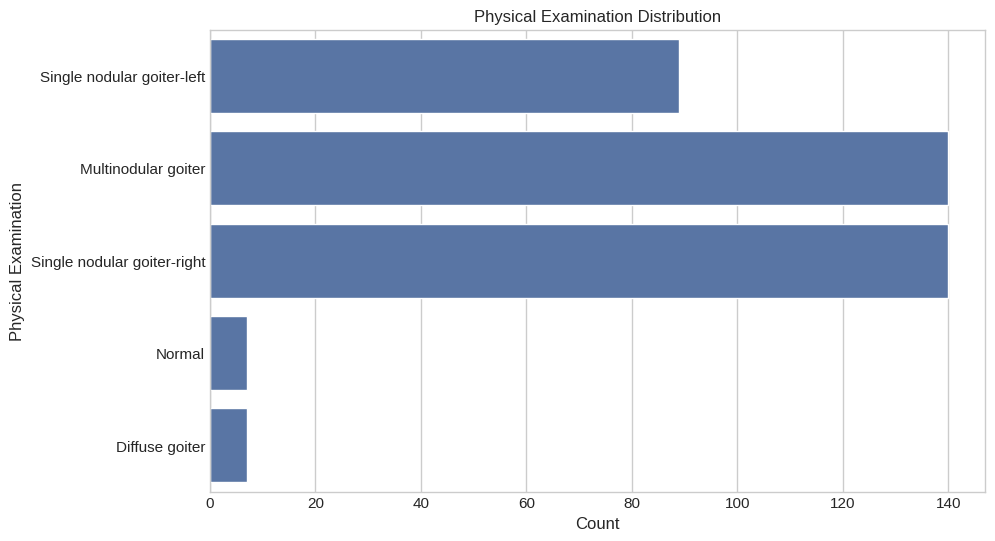

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Physical Examination', data=thyroid_data)
plt.title('Physical Examination Distribution')
plt.xlabel('Count')
plt.ylabel('Physical Examination')
plt.show()

**Adenopathy Distribution**

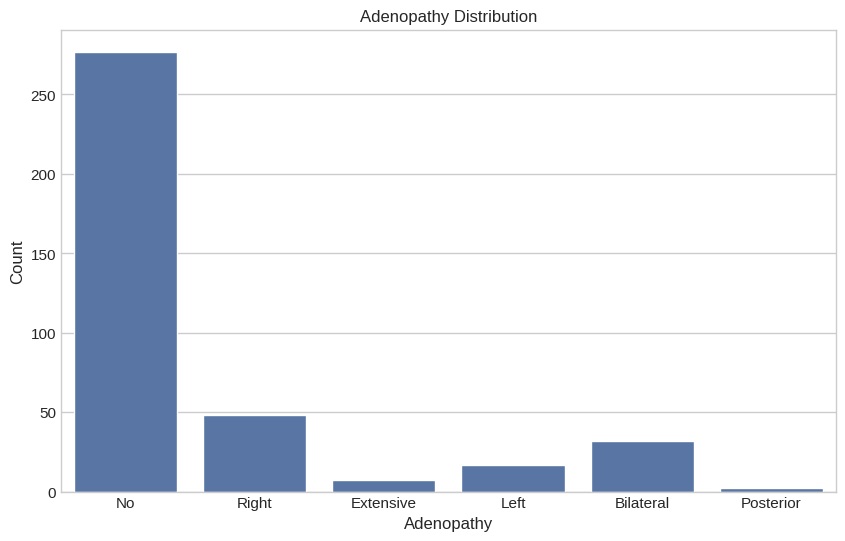

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Adenopathy', data=thyroid_data)
plt.title('Adenopathy Distribution')
plt.xlabel('Adenopathy')
plt.ylabel('Count')
plt.show()

**Focality Distribution**

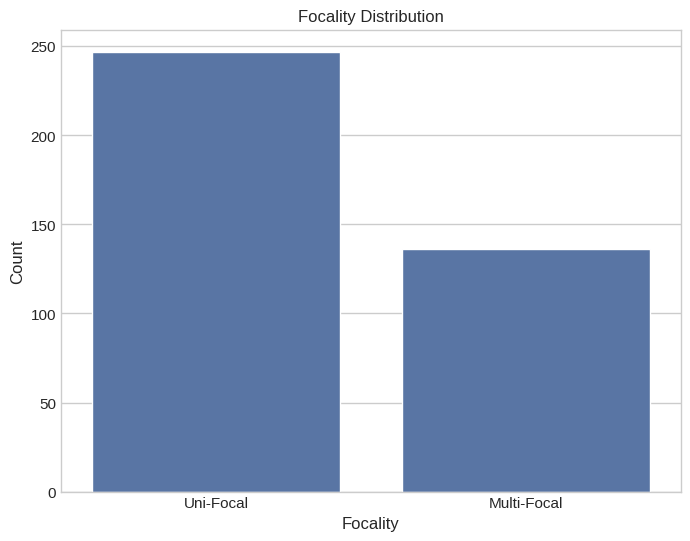

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Focality', data=thyroid_data)
plt.title('Focality Distribution')
plt.xlabel('Focality')
plt.ylabel('Count')
plt.show()

**Primary Tumor "T" Stage Distribution**

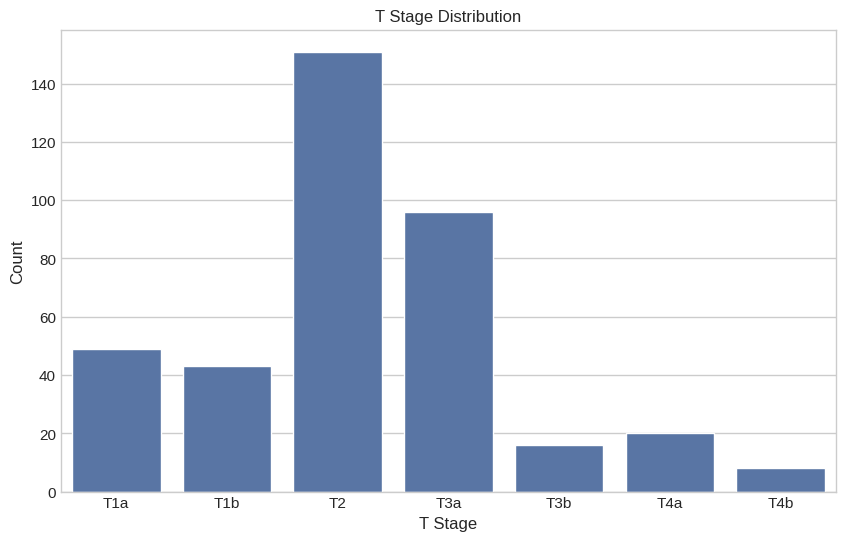

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='T', data=thyroid_data)
plt.title('T Stage Distribution')
plt.xlabel('T Stage')
plt.ylabel('Count')
plt.show()

**Regional Nymph Node "N" Stage Distribution**

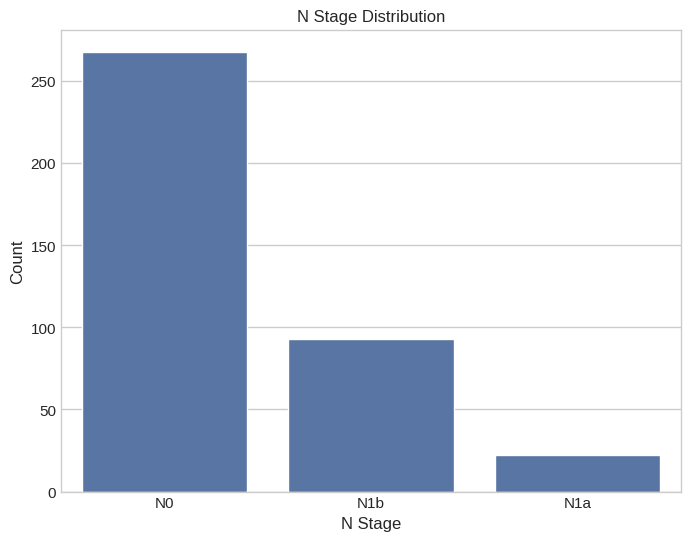

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='N', data=thyroid_data)
plt.title('N Stage Distribution')
plt.xlabel('N Stage')
plt.ylabel('Count')
plt.show()

**Distant Metastasis "M" Stage Distribution**

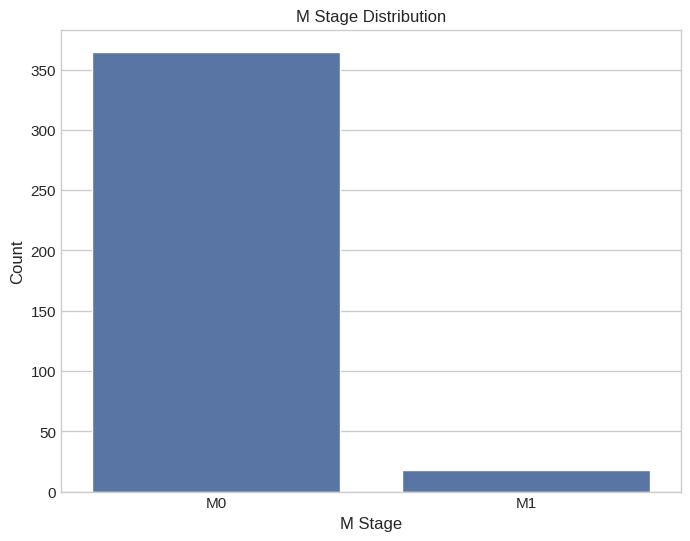

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='M', data=thyroid_data)
plt.title('M Stage Distribution')
plt.xlabel('M Stage')
plt.ylabel('Count')
plt.show()

**Cancer Stage Distribution**

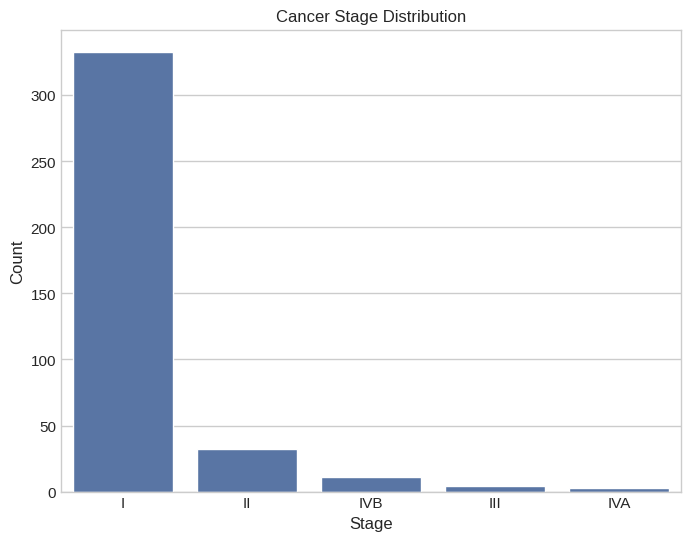

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stage', data=thyroid_data)
plt.title('Cancer Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

**Age & Stage Bar Chart**

<Figure size 1400x800 with 0 Axes>

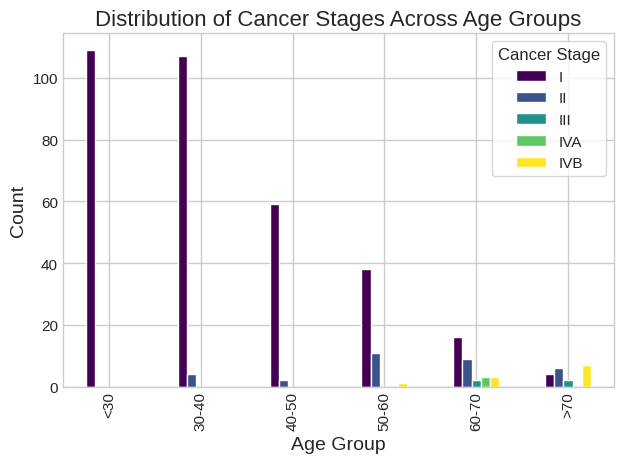

In [31]:
temp_data = thyroid_data.copy()
temp_data['Age_Group'] = pd.cut(temp_data['Age'],
                                  bins=[0, 30, 40, 50, 60, 70, 100],
                                  labels=['<30', '30-40', '40-50', '50-60', '60-70', '>70'])

plt.figure(figsize=(14, 8))
stage_age_counts = pd.crosstab(temp_data['Age_Group'], temp_data['Stage'])
stage_age_counts.plot(kind='bar', colormap='viridis')

plt.title('Distribution of Cancer Stages Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cancer Stage', frameon=True)
plt.tight_layout()
plt.show()

**Response Distribution**

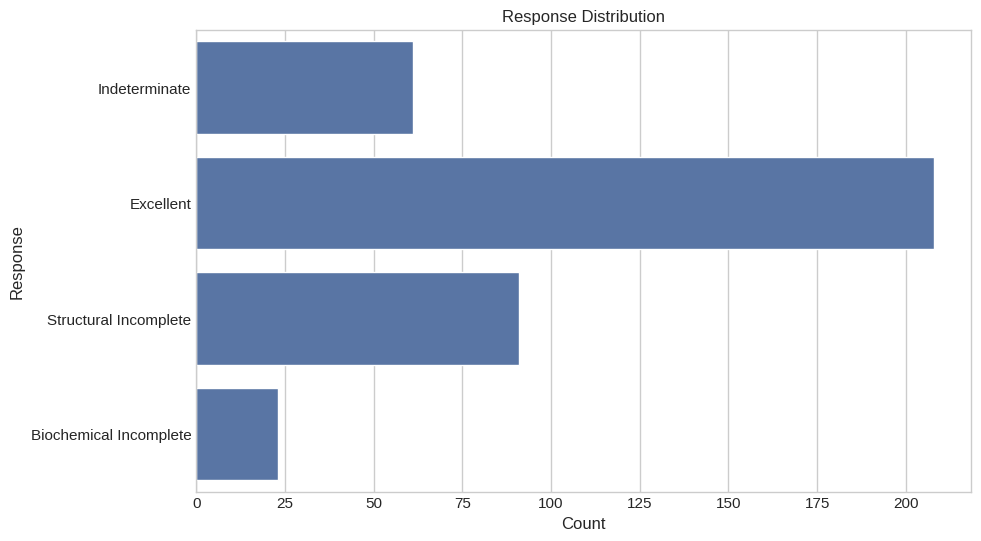

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Response', data=thyroid_data)
plt.title('Response Distribution')
plt.xlabel('Count')
plt.ylabel('Response')
plt.show()

**Risk and Response Bar Chart**

<Figure size 1400x800 with 0 Axes>

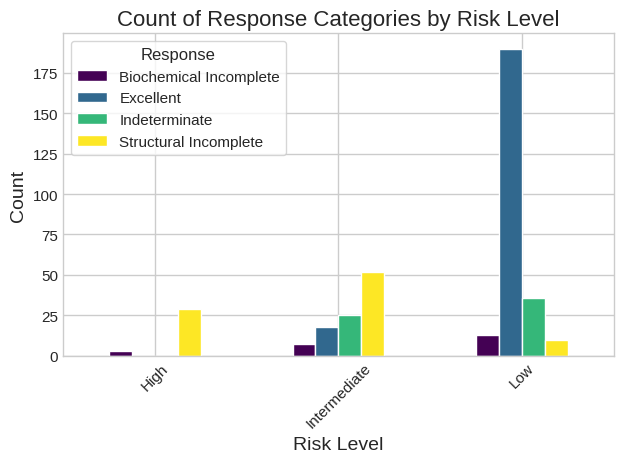

In [33]:
plt.figure(figsize=(14, 8))
risk_response_count = pd.crosstab(thyroid_data['Risk'], thyroid_data['Response'])
risk_response_count.plot(kind='bar', colormap='viridis')
plt.title('Count of Response Categories by Risk Level', fontsize=16)
plt.xlabel('Risk Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Response', frameon=True)
x_ticks = plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Visualizing Relationship with Recurrence**

**Age - Recurrence**

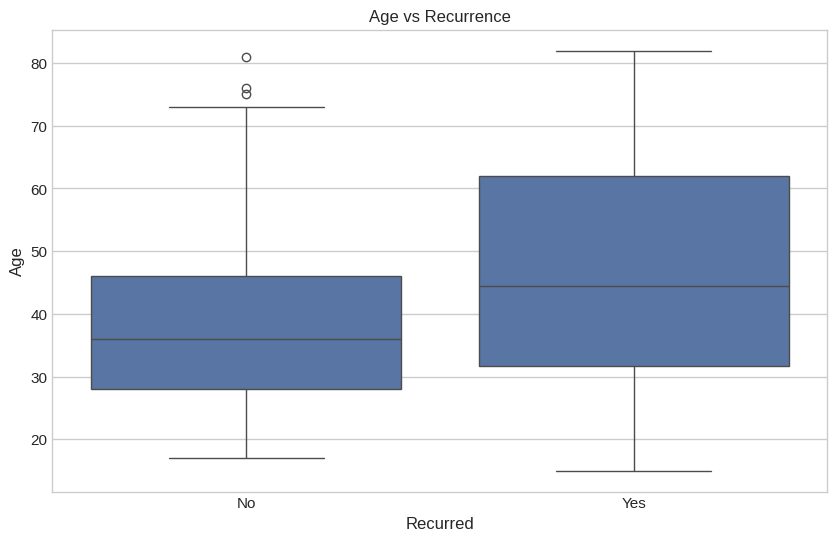

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Recurred', y='Age', data=thyroid_data)
plt.title('Age vs Recurrence')
plt.xlabel('Recurred')
plt.ylabel('Age')
plt.show()

**Gender - Recurrence**

<Figure size 1000x600 with 0 Axes>

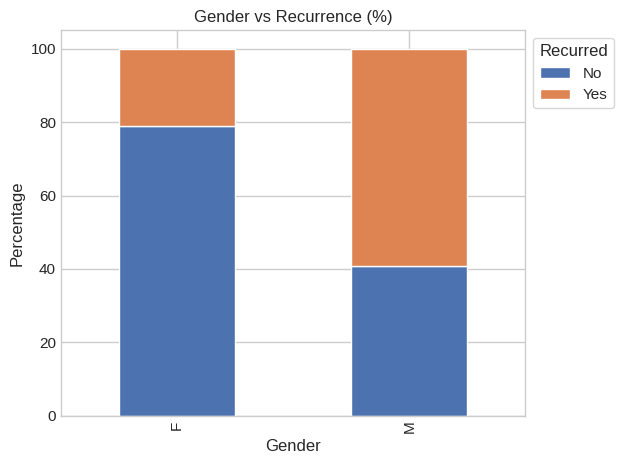

In [35]:
plt.figure(figsize=(10, 6))
recurrence_by_gender = pd.crosstab(thyroid_data['Gender'], thyroid_data['Recurred'])
recurrence_by_gender_pct = recurrence_by_gender.div(recurrence_by_gender.sum(axis=1), axis=0) * 100

recurrence_by_gender_pct.plot(kind='bar', stacked=True)
plt.title('Gender vs Recurrence (%)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Smoking - Recurrence**

<Figure size 1000x600 with 0 Axes>

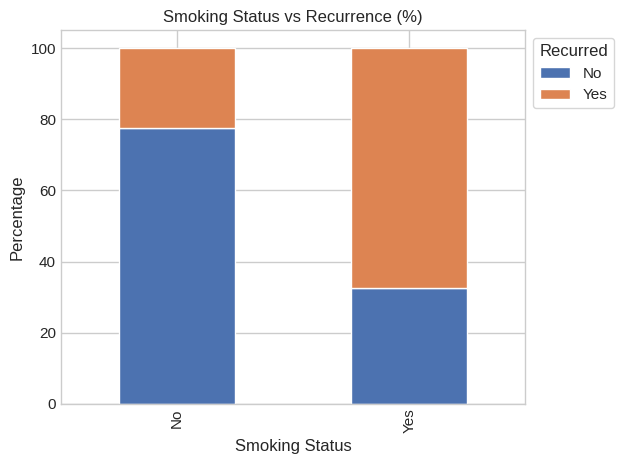

In [36]:
plt.figure(figsize=(10, 6))
recurrence_by_smoking = pd.crosstab(thyroid_data['Smoking'], thyroid_data['Recurred'])
recurrence_by_smoking_pct = recurrence_by_smoking.div(recurrence_by_smoking.sum(axis=1), axis=0) * 100

recurrence_by_smoking_pct.plot(kind='bar', stacked=True)
plt.title('Smoking Status vs Recurrence (%)')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**History of Smoking - Recurrence**

<Figure size 1000x600 with 0 Axes>

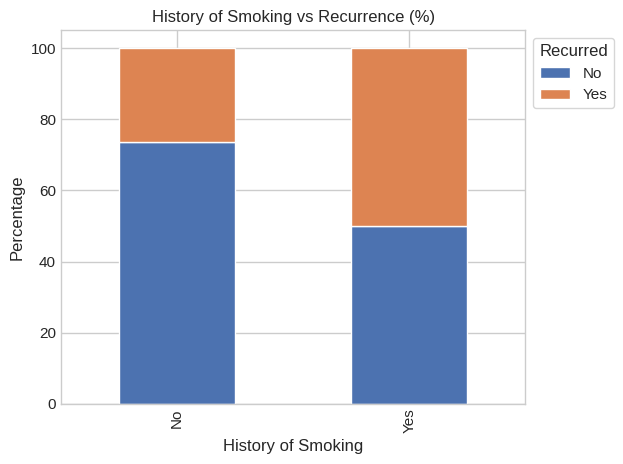

In [37]:
plt.figure(figsize=(10, 6))
recurrence_by_hx_smoking = pd.crosstab(thyroid_data['Hx Smoking'], thyroid_data['Recurred'])
recurrence_by_hx_smoking_pct = recurrence_by_hx_smoking.div(recurrence_by_hx_smoking.sum(axis=1), axis=0) * 100

recurrence_by_hx_smoking_pct.plot(kind='bar', stacked=True)
plt.title('History of Smoking vs Recurrence (%)')
plt.xlabel('History of Smoking')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**History of Radiotherapy - Recurrence**

<Figure size 1000x600 with 0 Axes>

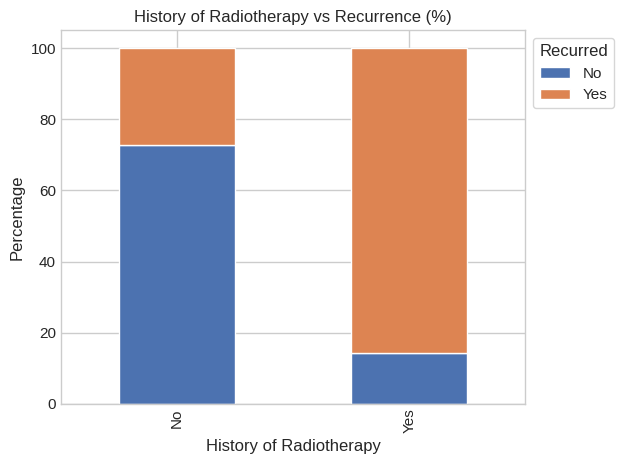

In [38]:
plt.figure(figsize=(10, 6))
recurrence_by_hx_radiotherapy = pd.crosstab(thyroid_data['Hx Radiotherapy'], thyroid_data['Recurred'])
recurrence_by_hx_radiotherapy_pct = recurrence_by_hx_radiotherapy.div(recurrence_by_hx_radiotherapy.sum(axis=1), axis=0) * 100

recurrence_by_hx_radiotherapy_pct.plot(kind='bar', stacked=True)
plt.title('History of Radiotherapy vs Recurrence (%)')
plt.xlabel('History of Radiotherapy')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Thyroid Function - Recurrence**

<Figure size 1200x600 with 0 Axes>

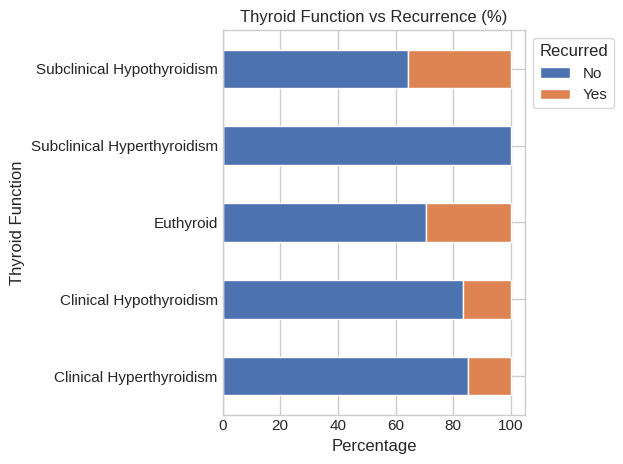

In [39]:
plt.figure(figsize=(12, 6))
recurrence_by_thyroid_function = pd.crosstab(thyroid_data['Thyroid Function'], thyroid_data['Recurred'])
recurrence_by_thyroid_function_pct = recurrence_by_thyroid_function.div(recurrence_by_thyroid_function.sum(axis=1), axis=0) * 100

recurrence_by_thyroid_function_pct.plot(kind='barh', stacked=True)
plt.title('Thyroid Function vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Thyroid Function')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Physical Examination - Recurrence**

<Figure size 1200x600 with 0 Axes>

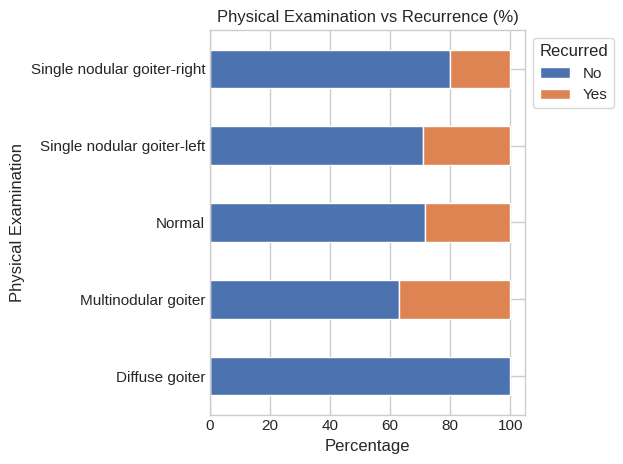

In [40]:
plt.figure(figsize=(12, 6))
recurrence_by_physical_exam = pd.crosstab(thyroid_data['Physical Examination'], thyroid_data['Recurred'])
recurrence_by_physical_exam_pct = recurrence_by_physical_exam.div(recurrence_by_physical_exam.sum(axis=1), axis=0) * 100

recurrence_by_physical_exam_pct.plot(kind='barh', stacked=True)
plt.title('Physical Examination vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Physical Examination')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Adenopathy - Recurrence**

<Figure size 1000x600 with 0 Axes>

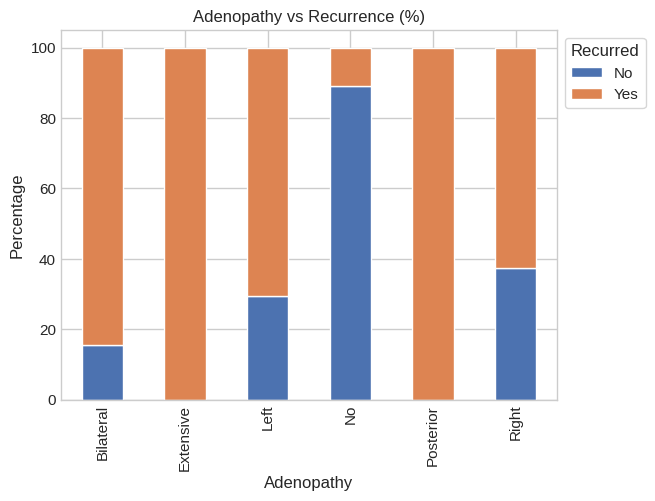

In [41]:
plt.figure(figsize=(10, 6))
recurrence_by_adenopathy = pd.crosstab(thyroid_data['Adenopathy'], thyroid_data['Recurred'])
recurrence_by_adenopathy_pct = recurrence_by_adenopathy.div(recurrence_by_adenopathy.sum(axis=1), axis=0) * 100

recurrence_by_adenopathy_pct.plot(kind='bar', stacked=True)
plt.title('Adenopathy vs Recurrence (%)')
plt.xlabel('Adenopathy')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

**Pathology - Recurrence**

<Figure size 1200x600 with 0 Axes>

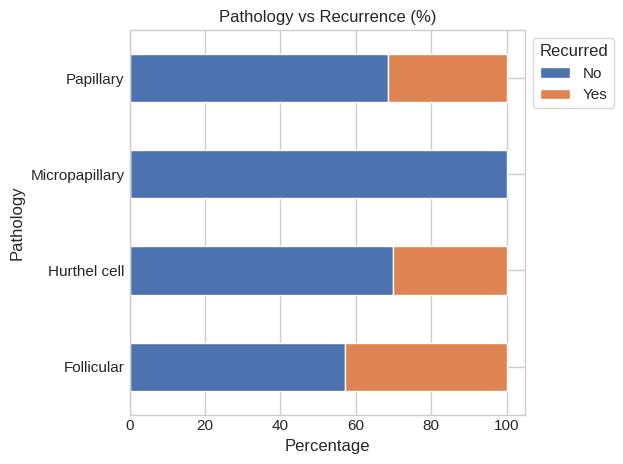

In [42]:
plt.figure(figsize=(12, 6))
recurrence_by_pathology = pd.crosstab(thyroid_data['Pathology'], thyroid_data['Recurred'])
recurrence_by_pathology_pct = recurrence_by_pathology.div(recurrence_by_pathology.sum(axis=1), axis=0) * 100

recurrence_by_pathology_pct.plot(kind='barh', stacked=True)
plt.title('Pathology vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Pathology')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Focality - Recurrence**

<Figure size 1000x600 with 0 Axes>

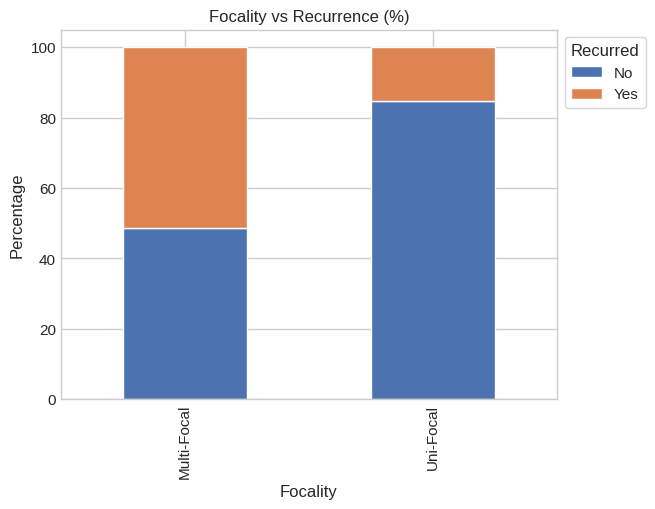

In [43]:
plt.figure(figsize=(10, 6))
recurrence_by_focality = pd.crosstab(thyroid_data['Focality'], thyroid_data['Recurred'])
recurrence_by_focality_pct = recurrence_by_focality.div(recurrence_by_focality.sum(axis=1), axis=0) * 100

recurrence_by_focality_pct.plot(kind='bar', stacked=True)
plt.title('Focality vs Recurrence (%)')
plt.xlabel('Focality')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

**Risk Level - Recurrence**

<Figure size 1200x600 with 0 Axes>

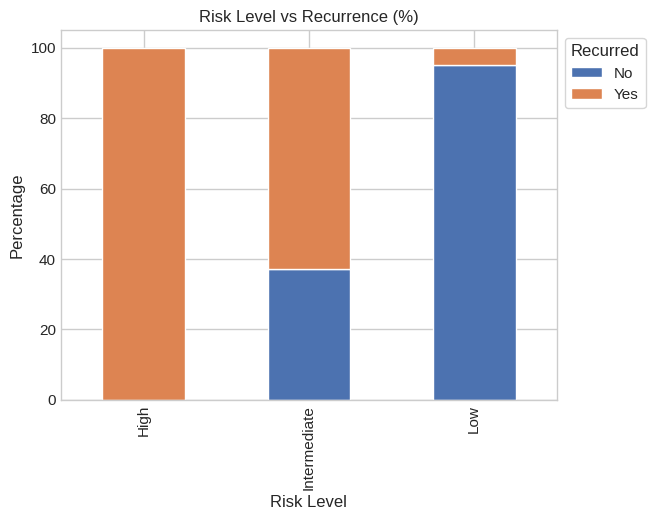

In [44]:
plt.figure(figsize=(12, 6))
recurrence_by_risk = pd.crosstab(thyroid_data['Risk'], thyroid_data['Recurred'])
recurrence_by_risk_pct = recurrence_by_risk.div(recurrence_by_risk.sum(axis=1), axis=0) * 100

recurrence_by_risk_pct.plot(kind='bar', stacked=True)
plt.title('Risk Level vs Recurrence (%)')
plt.xlabel('Risk Level')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

**T Stage - Recurrence**

<Figure size 1200x600 with 0 Axes>

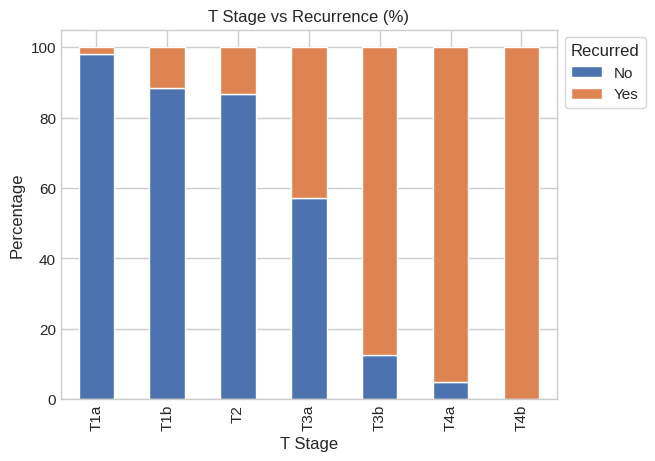

In [45]:
plt.figure(figsize=(12, 6))
recurrence_by_t = pd.crosstab(thyroid_data['T'], thyroid_data['Recurred'])
recurrence_by_t_pct = recurrence_by_t.div(recurrence_by_t.sum(axis=1), axis=0) * 100

recurrence_by_t_pct.plot(kind='bar', stacked=True)
plt.title('T Stage vs Recurrence (%)')
plt.xlabel('T Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

**N Stage - Recurrence**

<Figure size 1000x600 with 0 Axes>

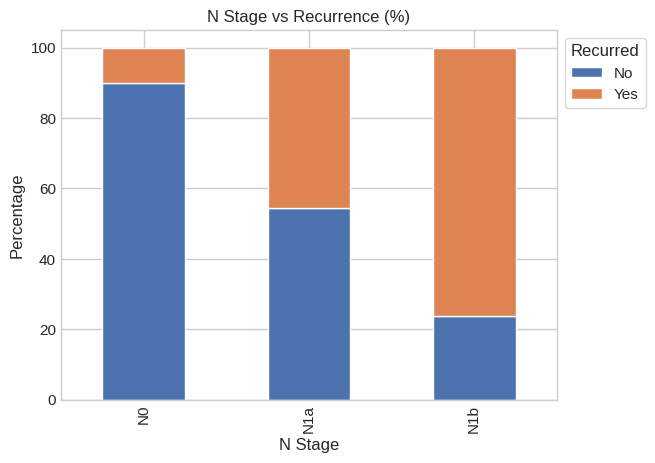

In [46]:
plt.figure(figsize=(10, 6))
recurrence_by_n = pd.crosstab(thyroid_data['N'], thyroid_data['Recurred'])
recurrence_by_n_pct = recurrence_by_n.div(recurrence_by_n.sum(axis=1), axis=0) * 100

recurrence_by_n_pct.plot(kind='bar', stacked=True)
plt.title('N Stage vs Recurrence (%)')
plt.xlabel('N Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.show()

**M-Stage - Recurrence**

<Figure size 1000x600 with 0 Axes>

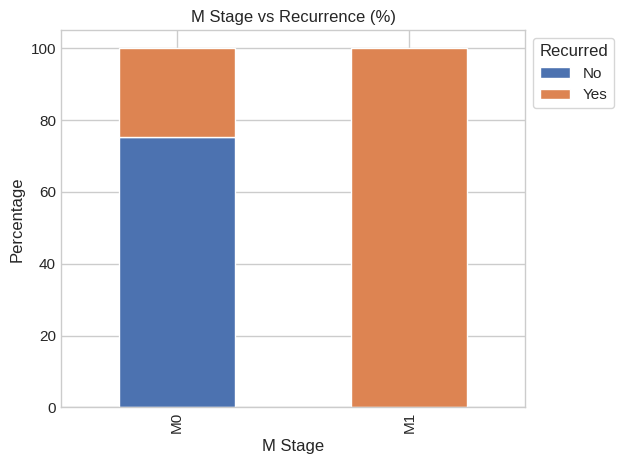

In [47]:
plt.figure(figsize=(10, 6))
recurrence_by_m = pd.crosstab(thyroid_data['M'], thyroid_data['Recurred'])
recurrence_by_m_pct = recurrence_by_m.div(recurrence_by_m.sum(axis=1), axis=0) * 100

recurrence_by_m_pct.plot(kind='bar', stacked=True)
plt.title('M Stage vs Recurrence (%)')
plt.xlabel('M Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Stage - Recurrence**

<Figure size 1000x600 with 0 Axes>

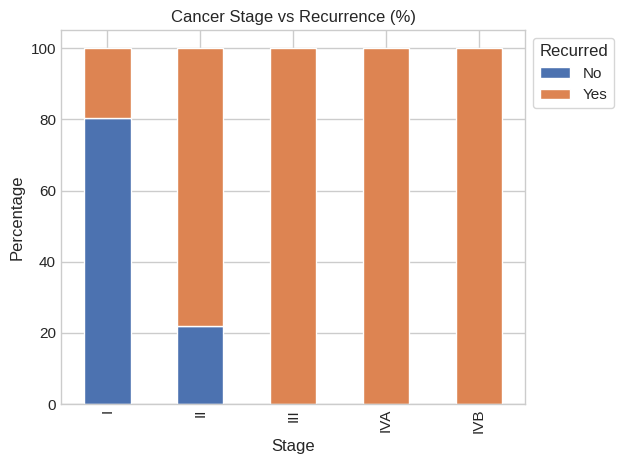

In [48]:
plt.figure(figsize=(10, 6))
recurrence_by_stage = pd.crosstab(thyroid_data['Stage'], thyroid_data['Recurred'])
recurrence_by_stage_pct = recurrence_by_stage.div(recurrence_by_stage.sum(axis=1), axis=0) * 100

recurrence_by_stage_pct.plot(kind='bar', stacked=True)
plt.title('Cancer Stage vs Recurrence (%)')
plt.xlabel('Stage')
plt.ylabel('Percentage')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

**Response - Recurrence**

<Figure size 1200x600 with 0 Axes>

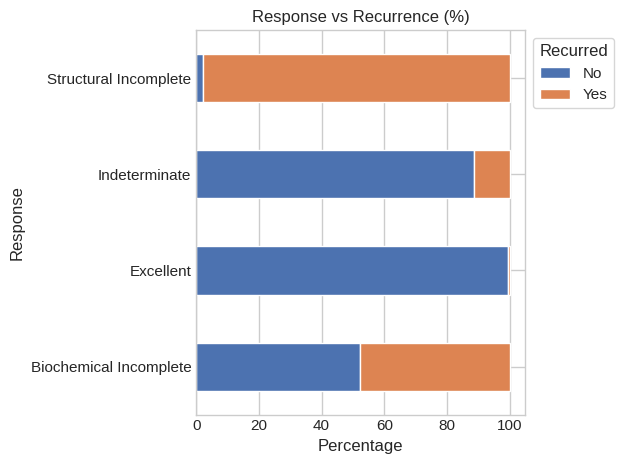

In [49]:
plt.figure(figsize=(12, 6))
recurrence_by_response = pd.crosstab(thyroid_data['Response'], thyroid_data['Recurred'])
recurrence_by_response_pct = recurrence_by_response.div(recurrence_by_response.sum(axis=1), axis=0) * 100

recurrence_by_response_pct.plot(kind='barh', stacked=True)
plt.title('Response vs Recurrence (%)')
plt.xlabel('Percentage')
plt.ylabel('Response')
plt.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

Female patients seem to have a lower recurrence rate compared to males. While  majority of the females don't experience recurrence, the recurrence rate among males is notably higher. This suggests that males may be an independent risk factor for recurrence.

Patients that have a history of radiotherapy show a substantially higher recurrence rate. This is significant as it highlights the fact that a history of radiotherapy is a strong predictor of recurrence, possibly due to some treatment-resistant characteristics in these patients. We must keep in mind the proportion of patients that have a history of radiotherapy is quite low so we can't simply jump to conclusions yet.

Having a history of smoking can be seen to be associated with a higher recurrence rate. Patients who have a history of smoking are more likely to experience recurrence compared to those who don't. Current smokers also have a much higher recurrence rate compared to non-smokers. This supports the hypothesis that smoking may contribute to diseases or impair the ability to respond to treatment. It further emphasizes the negative impact of tobacco use on thyroid cancer outcomes. It is a risk factor worth addressing as it can be altered as a precautionary step with patient education and consultation.

Looking at the TNM-Staging, we can see the most dramatic change in the M stage (Metastasis) analysis as having been catagorized in M1, meaning the cancer has spread to another part of the body, almost universally indicates recurrence. This finding underscores just how important this factor is and calls for a need of strong surveillence of the cancer. As for the T stage (Tumor), something noteworthy is how in the earlier stages, there is a low recurrence rate, however, at the more advanced T stages, the recurrence rate gets progressively higher and higher. This indicates that the tumor size is yet another key factor to keep in mind when assessing the risk for recurrence.

Looking into the different pathological subtypes of thyroid cancer we see that Papillary and Hürthle Cell carcinomas have a moderate recurrence rates while micropapillary carcinoma shows nearly no recurrence. Follicular carcinoma, however, has the highest recurrence rate than than the rest. These findings suggest that the thyroid cancer subtype should be keeped in consideration when performing risk assessment.

As an summary of all the features, we can see that advanced T, N, and M stages, classification of high risk, and poor response to initial therapy are strongly associated with recurrence. Being a Male and a smoker (both current and in the past) are also linked to higher recurrence. Having certain kinds of pathological subtype, such as Follicular, is a strong indication of recurrence.

# **Feature Correlation Matrix**

**Prepping the Data**

In [50]:
corr_data = thyroid_data.copy()
categorical_columns = corr_data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    corr_data[column] = label_encoder.fit_transform(corr_data[column].astype(str))

corr_data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiotherapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0


**Producing the Visual**

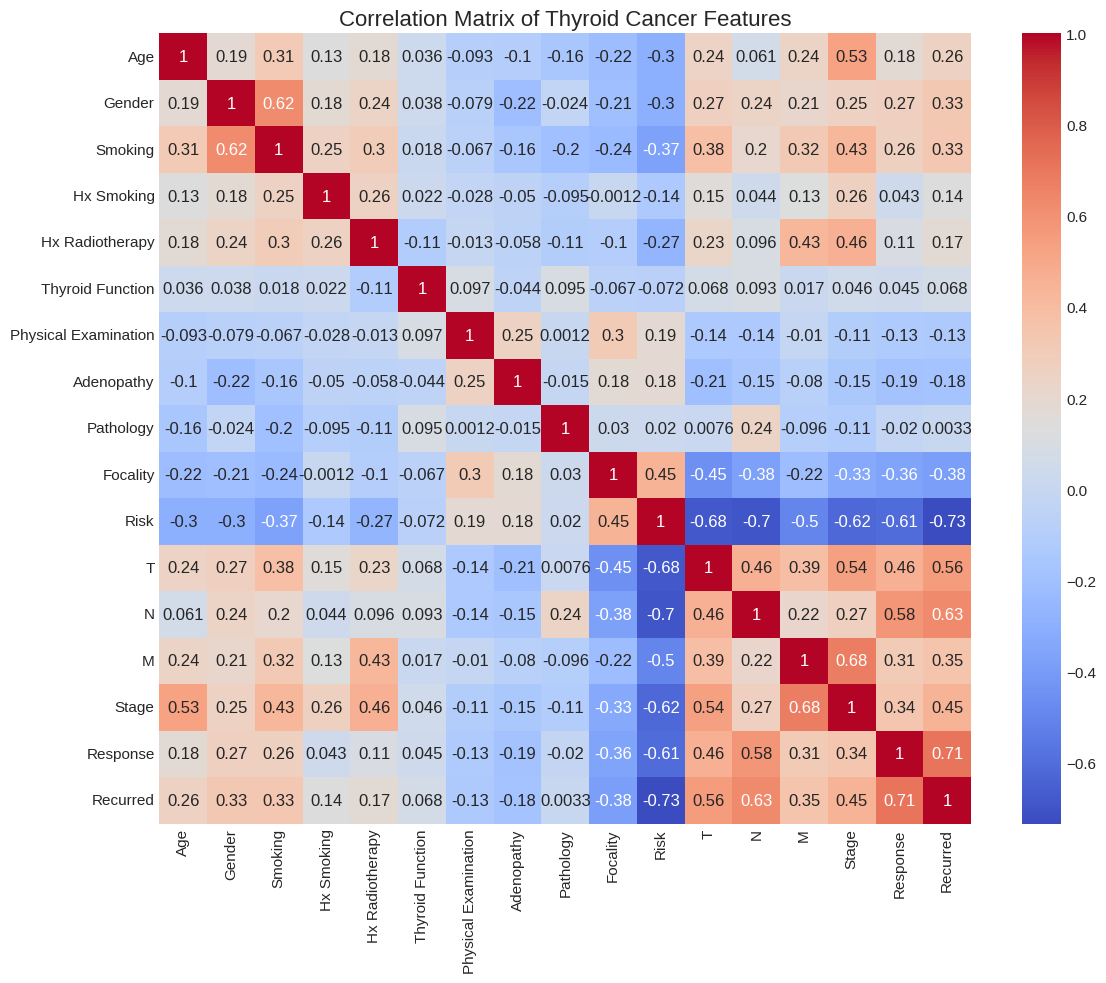

In [51]:
correlation_matrix = corr_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Thyroid Cancer Features', fontsize=16)
plt.tight_layout()
plt.show()

**Correlation Strength List**

In [52]:
recurrence_correlations = correlation_matrix['Recurred'].sort_values(key=abs, ascending=False)

print("Correlations w/ recurrence (sorted by strength):")
print(recurrence_correlations)

Correlations w/ recurrence (sorted by strength):
Recurred                1.000000
Risk                   -0.733376
Response                0.708957
N                       0.632323
T                       0.556201
Stage                   0.449137
Focality               -0.383776
M                       0.354360
Smoking                 0.333243
Gender                  0.328189
Age                     0.258897
Adenopathy             -0.182530
Hx Radiotherapy         0.174407
Hx Smoking              0.136073
Physical Examination   -0.131801
Thyroid Function        0.067758
Pathology               0.003272
Name: Recurred, dtype: float64


# **Statistical Analysis**

**Building T-test and Chi-Square Test Functions**

In [ ]:
def perform_ttest(data, numerical_var, target_var='Recurred'):
    # split based on recurr
    recurred = data[data[target_var] == 'Yes'][numerical_var]
    not_recurred = data[data[target_var] == 'No'][numerical_var]

    t_stat, p_value = stats.ttest_ind(recurred, not_recurred, equal_var=False)

    #calc mean values
    mean_recurred = recurred.mean()
    mean_not_recurred = not_recurred.mean()

    return {
        'variable': numerical_var,
        't_statistic': t_stat,
        'p_value': p_value,
        'mean_recurred': mean_recurred,
        'mean_not_recurred': mean_not_recurred,
        'significant': p_value < 0.05
    }

def perform_chi2(data, categorical_var, target_var='Recurred'):
    #contingency table
    contingency_table = pd.crosstab(data[categorical_var], data[target_var])
    print(f"\nContingency Table for {categorical_var}:")
    print(contingency_table)
    print("----------------------------------------")

    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    return {
        'variable': categorical_var,
        'chi2_statistic': chi2,
        'p_value': p_value,
        'degrees_of_freedom': dof,
        'significant': p_value < 0.05
    }

**Perform & Print Test Results**

In [ ]:
numerical_vars = ['Age']
categorical_vars = [col for col in thyroid_data.columns if col != 'Age' and col != 'Recurred']

#t-test
ttest_results = []
for var in numerical_vars:
    result = perform_ttest(thyroid_data, var)
    ttest_results.append(result)

ttest_df = pd.DataFrame(ttest_results)
print("T-test results for numerical variables:\n")
print(ttest_df)

print("----------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------")


#chi-square tests
chi2_results = []
for var in categorical_vars:
    result = perform_chi2(thyroid_data, var)
    chi2_results.append(result)

chi2_df = pd.DataFrame(chi2_results)
print("\nChi-square test results for categorical variables:\n")
print(chi2_df.sort_values('p_value').reset_index(drop=True))

#find significant vars
significant_vars = chi2_df[chi2_df['p_value'] < 0.05]['variable'].tolist()
if any(ttest_df['p_value'] < 0.05):
    significant_vars.extend(ttest_df[ttest_df['p_value'] < 0.05]['variable'].tolist())

print("\nStatistically significant variables (p < 0.05):\n")
print(significant_vars)

T-test results for numerical variables:

  variable  t_statistic   p_value  mean_recurred  mean_not_recurred  significant
0      Age       4.5215  0.000012      47.111111          38.414545         True
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------

Contingency Table for Gender:
Recurred   No  Yes
Gender            
F         246   66
M          29   42
----------------------------------------

Contingency Table for Smoking:
Recurred   No  Yes
Smoking           
No        259   75
Yes        16   33
----------------------------------------

Contingency Table for Hx Smoking:
Recurred     No  Yes
Hx Smoking          
No          261   94
Yes          14   14
----------------------------------------

Contingency Table for Hx Radiotherapy:
Recurred          No  Yes
Hx Radiotherapy          
No               274  102
Yes                1    6
------------------------------

- The t-test assumes normality of the numerical variable. If this assumption is violated, then it won't be as accurate. Verify it with the Shapiro-Wilk test.
- The chi-square test assumes sufficiently large expected frequencies. If there is small sample sizes or rare categories, then it will be less accurate.

**Re: Age distribution**

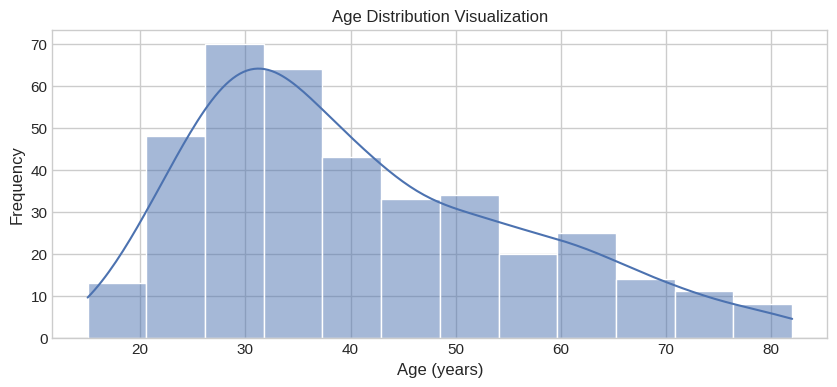

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(thyroid_data['Age'], kde=True)
plt.title('Age Distribution Visualization')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

Right-skewed distribution

**Q-Q Plot for Age Distribution**

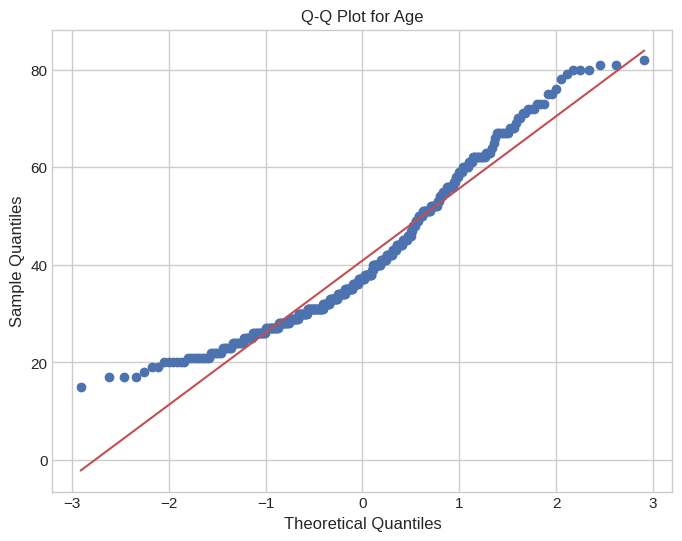

In [ ]:
plt.figure(figsize=(8, 6))
stats.probplot(thyroid_data['Age'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Age')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

Notice that the points don't fall on the line and deviates a lot. This is indication of non-normality.

**Shapiro-Wilk Test on Age**

In [ ]:
shapiro_stat, shapiro_p = stats.shapiro(thyroid_data['Age'])
print(f"Shapiro-Wilk Test for Age:\nStatistic: {shapiro_stat:.4f}, p-value: {shapiro_p:.4f}")

alpha = 0.05
if shapiro_p > alpha:
    print("\nAge appears normally distributed (p > 0.05) - t-test is fine")
else:
    print("\nAge does NOT follow normal distribution (p < 0.05) - Use Mann-Whitney U test")

Shapiro-Wilk Test for Age:
Statistic: 0.9422, p-value: 0.0000

Age does NOT follow normal distribution (p < 0.05) - Use Mann-Whitney U test


From both the graphs and the Shapiro-Wilk test, we concluded that the distribution of age is not normal and so a non-parametric test—the Mann-Whitney U test—would be more appropriate for it.

**Mann-Whitney U Test for Age**

In [ ]:
recurred_age = thyroid_data[thyroid_data['Recurred'] == 'Yes']['Age']
not_recurred_age = thyroid_data[thyroid_data['Recurred'] == 'No']['Age']

u_stat, p_value = stats.mannwhitneyu(recurred_age, not_recurred_age, alternative='two-sided')
print(f"Mann-Whitney U Test Results:\nU-statistic: {u_stat}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference in Age between recurred and not recurred groups.")
else:
    print("No significant difference in Age between recurred and not recurred groups.")

Mann-Whitney U Test Results:
U-statistic: 18880.0, p-value: 0.0000
Significant difference in Age between recurred and not recurred groups.


We can conclude that "Age" is a statistically significant feature in terms of the recurrence. The difference in age between the the two groups (recurred and not recurred) is unlikely to be due to random chance.

Looking back at the contingency tables, we can see that there are a few variables that violate the assumptions of the Chi-Square test: Hx Radiotherapy, Thyroid Function, Physical Examination, Adenopathy, Stage, and Pathology. The Chi-Square test expects all cells to have at least 5 count, and the ones listed all don't meet that assumption. Therefore, we must turn to the Fisher's Exact test and the Fisher-Freeman-Halton Exact test for these variables. I will also be collapsing some rarer categories to ensure test validity. Fisher's Exact test is to be used for 2 by 2 tables so in this case, it will only be Hx Radiotherapy. Fisher-Freeman-Halton Exact test is for larger tables with more catagories. Both of these test are appropriate for small cell counts and still provide valid statistical results.

**Collapse Variables**

In [ ]:
# Collapse categories for Stage
thyroid_data['Stage'] = thyroid_data['Stage'].replace({
    'IVA': 'Advanced Stage IV',
    'IVB': 'Advanced Stage IV'
})

# Collapse categories for Thyroid Function
thyroid_data['Thyroid Function'] = thyroid_data['Thyroid Function'].replace({
    'Clinical Hyperthyroidism': 'Any Hyperthyroidism',
    'Subclinical Hyperthyroidism': 'Any Hyperthyroidism',
    'Clinical Hypothyroidism': 'Any Hypothyroidism',
    'Subclinical Hypothyroidism': 'Any Hypothyroidism'
})

**Fisher's Exact Test for Hx Radiotherapy**

In [ ]:
contingency_table_radiotherapy = pd.crosstab(thyroid_data['Hx Radiotherapy'], thyroid_data['Recurred'])

odds_ratio, p_value_radiotherapy = fisher_exact(contingency_table_radiotherapy)
print(f"Fisher's Exact Test for Hx Radiotherapy:\nOdds Ratio: {odds_ratio:.4f}, p-value: {p_value_radiotherapy:.4f}")

Fisher's Exact Test for Hx Radiotherapy:
Odds Ratio: 16.1176, p-value: 0.0024


**Fisher-Freeman-Halton Exact Test for the Other Variables**

In [ ]:
contingency_table_thyroid_function = pd.crosstab(thyroid_data['Thyroid Function'], thyroid_data['Recurred'])

table_thyroid_function = Table(contingency_table_thyroid_function.values)
result_thyroid_function = table_thyroid_function.test_nominal_association()
print(f"Fisher-Freeman-Halton Exact Test for Thyroid Function:\np-value: {result_thyroid_function.pvalue:.4f}")

print("-----------------------------------------------------")

contingency_table_physical_examination = pd.crosstab(thyroid_data['Physical Examination'], thyroid_data['Recurred'])

table_physical_examination = Table(contingency_table_physical_examination.values)
result_physical_examination = table_physical_examination.test_nominal_association()
print(f"Fisher-Freeman-Halton Exact Test for Physical Examination:\np-value: {result_physical_examination.pvalue:.4f}")

print("-----------------------------------------------------")

contingency_table_adenopathy = pd.crosstab(thyroid_data['Adenopathy'], thyroid_data['Recurred'])

table_adenopathy = Table(contingency_table_adenopathy.values)
result_adenopathy = table_adenopathy.test_nominal_association()
print(f"Fisher-Freeman-Halton Exact Test for Adenopathy:\np-value: {result_adenopathy.pvalue:.4f}")

print("-----------------------------------------------------")

contingency_table_stage = pd.crosstab(thyroid_data['Stage'], thyroid_data['Recurred'])

table_stage = Table(contingency_table_stage.values)
result_stage = table_stage.test_nominal_association()
print(f"Fisher-Freeman-Halton Exact Test for Stage:\np-value: {result_stage.pvalue:.4f}")

print("-----------------------------------------------------")

contingency_table_pathology = pd.crosstab(thyroid_data['Pathology'], thyroid_data['Recurred'])

table_pathology = Table(contingency_table_pathology.values)
result_pathology = table_pathology.test_nominal_association()
print(f"Fisher-Freeman-Halton Exact Test for Pathology:\np-value: {result_pathology.pvalue:.4f}")

Fisher-Freeman-Halton Exact Test for Thyroid Function:
p-value: 0.1698
-----------------------------------------------------
Fisher-Freeman-Halton Exact Test for Physical Examination:
p-value: 0.0180
-----------------------------------------------------
Fisher-Freeman-Halton Exact Test for Adenopathy:
p-value: 0.0000
-----------------------------------------------------
Fisher-Freeman-Halton Exact Test for Stage:
p-value: 0.0000
-----------------------------------------------------
Fisher-Freeman-Halton Exact Test for Pathology:
p-value: 0.0001


For both the tests, I compared the p-value to an alpha of 0.05. Being less that the alpha would mean that there is statistical significance on the association beteen the feature and recurrence. Being above would mean the opposite.

- Significant Associations : Hx Radiotherapy, Physical Examination, Adenopathy, Stage, and Pathology
- Non-Significant Association : Thyroid Function
---
Final Statistically significant variables :
'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiotherapy', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Age'

# **Feature Selection**

Tree-based (AdaBoost)
LASSO (L1 regularization)

**AdaBoost Implementation**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

x = thyroid_data.drop(columns=['Recurred'])
y = thyroid_data['Recurred']

x_encoded = pd.get_dummies(x, drop_first=True)

# default is stumps, combined 50
ada_model = AdaBoostClassifier(n_estimators=50)

ada_model.fit(x_encoded, y)

feature_importances = ada_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_encoded.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df[feature_importance_df['Importance'] != 0]
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("AdaBoost Feature Importances:\n", feature_importance_df)

AdaBoost Feature Importances:
                                              Feature  Importance
0                                                Age    0.298739
34                                Response_Excellent    0.141063
36                    Response_Structural Incomplete    0.135196
16                            Pathology_Hurthel cell    0.075551
21                                          Risk_Low    0.072620
35                            Response_Indeterminate    0.062838
1                                           Gender_M    0.036597
6                         Thyroid Function_Euthyroid    0.034650
22                                             T_T1b    0.026905
31                                           Stage_I    0.020313
17                          Pathology_Micropapillary    0.018352
29                                             N_N1b    0.015038
23                                              T_T2    0.014431
10  Physical Examination_Single nodular goiter-right    0.0

**LASSO Implementation**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
le = LabelEncoder()

x = thyroid_data.drop(columns=['Recurred'])
y = thyroid_data['Recurred']

for column in x.select_dtypes(include=['object']).columns:
    x[column] = le.fit_transform(x[column])

y = le.fit_transform(y)

lasso_model = LassoCV(cv=5)
lasso_model.fit(x, y)

lasso_coefficients = lasso_model.coef_
lasso_feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': lasso_coefficients})

lasso_feature_importance_df = lasso_feature_importance_df[lasso_feature_importance_df['Coefficient'] != 0]
lasso_feature_importance_df = lasso_feature_importance_df.reindex(lasso_feature_importance_df['Coefficient'].abs().sort_values(ascending=False).index)
print("LASSO Feature Importances:\n", lasso_feature_importance_df)

LASSO Feature Importances:
                  Feature  Coefficient
10                  Risk    -0.229791
15              Response     0.180938
12                     N     0.068936
1                 Gender     0.061333
3             Hx Smoking     0.040152
5       Thyroid Function     0.038578
11                     T     0.021519
14                 Stage     0.005097
0                    Age     0.001734
6   Physical Examination     0.001356
8              Pathology    -0.000008


The results for both feature selection model differ and that stems from how the models work. AdaBoost is a whole group of decision trees and they measure importance by training each tree on a small subset of the data and each later tree is based on the improves upon the errors of the previous tree. LASSO is a linear regression model that uses the mathematical principle of L1 regularization. What that does is reduces less important features, sometimes to near zero, in order to find the best features that doesn't overfit. We can also see that the outputs are different. AdaBoost give more specific categories whilst LASSO gives the more broad feature. AdaBoost also ranks based on importance whilst LASSO gives the coefficient where the absolute value of that coefficient is attributed to its strength.

---
Commonalities:
Age, Response, Pathology, Risk, Gender, Thyroid Function, T, Stage, N, Physical Examination

Difference:
Adenopathy, Hx Smoking

Despite the difference the two methods have, we will still be using all the features that are mentioned as they pose importance in accordance to the methodologies of the different implementations. The features selected by the models are: Age, Gender, Hx Smoking, Thyroid Function, Physical Examination, Adenopathy, Pathology, Risk, T, N, Stage, Response.

Now, keeping in mind that in the previous step, we found the association between thyroid function and recurrence to be **statistically insignificant**, it will not be included in the selected features for modeling.

Final selected features : 'Age', 'Gender', 'Hx Smoking', 'Physical Examination', 'Adenopathy', 'Pathology', 'Risk', 'T', 'N', 'Stage', 'Response'

# **Predictive Models: Comparative Analysis**

Comparative Analysis of Logistic Regression, Random Forest, Gradient Boost (XGBoost), K-Means (KNN).

**Selecting Important Features**

In [85]:
features = ['Age', 'Gender', 'Hx Smoking', 'Physical Examination', 'Adenopathy', 'Pathology', 'Risk', 'T', 'N', 'Stage', 'Response']

x = thyroid_data[features]
y = thyroid_data['Recurred']

x_encoded = pd.get_dummies(x, drop_first=True)
training_columns = x_encoded.columns.tolist() #saved for later
y_encoded = le.fit_transform(y)

**Scaling Features**

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded)

**Split into Training & Test Sets**

In [87]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

**Model Initiation**

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
knn_model = KNeighborsClassifier()

**Training & Testing**

In [89]:
logreg_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
xgb_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)

logreg_pred = logreg_model.predict(x_test)
rf_pred = rf_model.predict(x_test)
xgb_pred = xgb_model.predict(x_test)
knn_pred = knn_model.predict(x_test)

**Evaluating the Models**


Model Performance Comparison:
                 model  accuracy  precision    recall        f1   roc_auc
0  Logistic Regression  0.948052   0.950000  0.863636  0.904762  0.991736
1        Random Forest  0.974026   1.000000  0.909091  0.952381  0.990083
2              XGBoost  0.961039   0.952381  0.909091  0.930233  0.995868
3                  KNN  0.961039   0.952381  0.909091  0.930233  0.971074


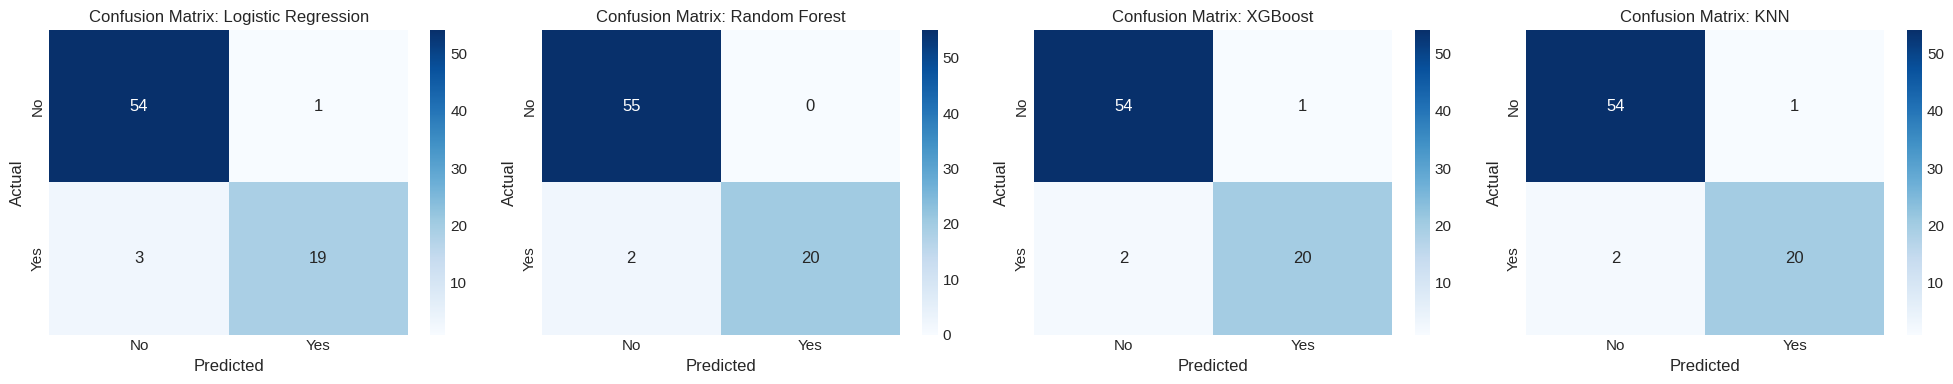

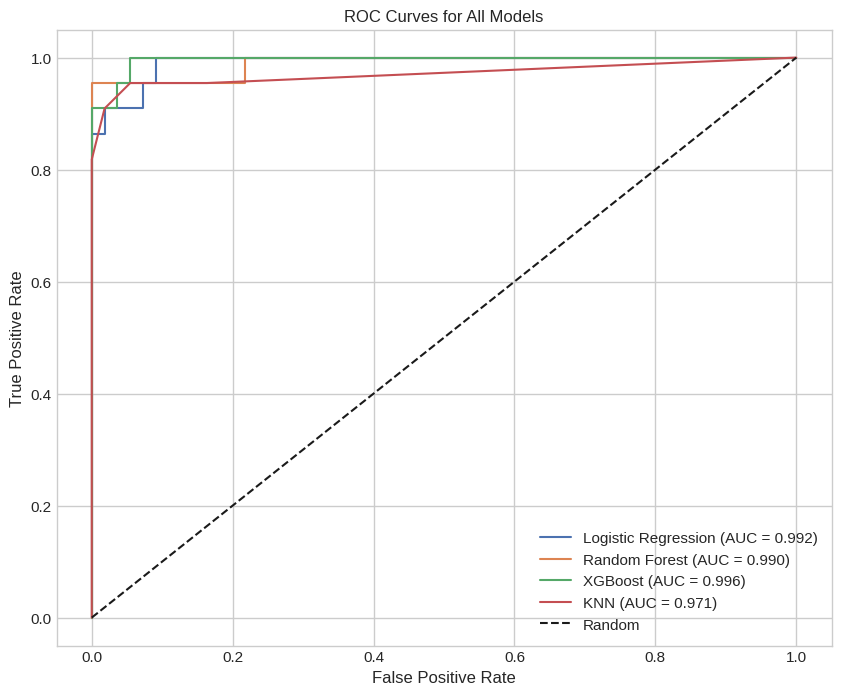


Best performing model based on F1 score: Random Forest
F1 Score: 0.9524


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve

# eval function
def evaluate_model(y_true, y_pred, y_prob, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_true, y_prob)

    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

#prob predict for ROC curve
logreg_prob = logreg_model.predict_proba(x_test)[:, 1]
rf_prob = rf_model.predict_proba(x_test)[:, 1]
xgb_prob = xgb_model.predict_proba(x_test)[:, 1]
knn_prob = knn_model.predict_proba(x_test)[:, 1]

results = []
results.append(evaluate_model(y_test, logreg_pred, logreg_prob, 'Logistic Regression'))
results.append(evaluate_model(y_test, rf_pred, rf_prob, 'Random Forest'))
results.append(evaluate_model(y_test, xgb_pred, xgb_prob, 'XGBoost'))
results.append(evaluate_model(y_test, knn_pred, knn_prob, 'KNN'))

results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)

#confusion matrices
models = {
    'Logistic Regression': {'pred': logreg_pred, 'prob': logreg_prob},
    'Random Forest': {'pred': rf_pred, 'prob': rf_prob},
    'XGBoost': {'pred': xgb_pred, 'prob': xgb_prob},
    'KNN': {'pred': knn_pred, 'prob': knn_prob}
}

plt.figure(figsize=(20, 4))
for i, (name, model_results) in enumerate(models.items()):
    plt.subplot(1, 4, i+1)
    cm = confusion_matrix(y_test, model_results['pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

#ROC curve
plt.figure(figsize=(10, 8))
for name, model_results in models.items():
    fpr, tpr, _ = roc_curve(y_test, model_results['prob'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {results_df.loc[results_df["model"] == name, "roc_auc"].values[0]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()

#F1
best_model_idx = results_df['f1'].idxmax()
best_model = results_df.loc[best_model_idx, 'model']
print(f"\nBest performing model based on F1 score: {best_model}")
print(f"F1 Score: {results_df.loc[best_model_idx, 'f1']:.4f}")

True/False Positive/Negative

* Accuracy = (TP+TN) / (TP+TN+FP+FN)
** proportion of correct over total cases
* Precision = TP / (TP+FP)
** Of all predicted recurrent patients, how many did?
* Recall = TP / (TP+FN)
** Of all the actual recurrent patients, how many correctly predicted?
* F1 = 2 * (precision * recall) / (precision * recall)
** average of percision and recall
* ROC-AUC = area under the curve comparing model's TP rate and FP rate
** "If I pick one patient who actually had recurrence and one who didn't, how often does the model give the higher risk score to the recurrent patient?"

Implications of False Positive and False Negatives:
* False Positive:
-- This can lead to unnecessary treatment and medical costs on both the patient and the hospital. It can also cause unnecessary stress and anxiety.
* False Negative:
-- This can lead to incorrect recurrence knowledge and patients missing treatment. Attention to the patient may be delayed and conditions could worsen.

# **Neural Network Model: Performance Analysis**

Implementing a Feedforward Neural Network (FNN) using TensorFlow

**Setting Up**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

np.random.seed(42)
tf.random.set_seed(42)

**Preparing and Scaling Data**

In [ ]:
features = ['Age', 'Gender', 'Hx Smoking', 'Physical Examination', 'Adenopathy', 'Pathology', 'Risk', 'T', 'N', 'Stage', 'Response']
x = thyroid_data[features]
y = thyroid_data['Recurred']

x_encoded = pd.get_dummies(x, drop_first=True)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_encoded)

y = le.fit_transform(y)

**Testing & Training Set Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

**Building the Model**

In [ ]:
model = Sequential()

#Input layer
model.add(Dense(128, activation='relu',
                kernel_initializer=HeNormal(seed=42),
                kernel_regularizer=l2(0.0001),
                input_shape=(x_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#hidden layers
model.add(Dense(64, activation='relu',
                kernel_initializer=HeNormal(seed=42),
                kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu',
                kernel_initializer=HeNormal(seed=42),
                kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#output layer
model.add(Dense(1, activation='sigmoid'))

#compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,489 (60.50 KB)

 Trainable params: 15,041 (58.75 KB)

 Non-trainable params: 448 (1.75 KB)

**Training the Model**

In [ ]:
#callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

#model parameters and train
history = model.fit(
    x_train, y_train,
    batch_size=16,
    epochs=150,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5203 - auc_1: 0.5177 - loss: 0.9134 - precision_1: 0.3461 - recall_1: 0.6377 - val_accuracy: 0.7581 - val_auc_1: 0.8091 - val_loss: 0.5481 - val_precision_1: 0.5333 - val_recall_1: 0.5000 - learning_rate: 0.0010
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7046 - auc_1: 0.8189 - loss: 0.5871 - precision_1: 0.5125 - recall_1: 0.7582 - val_accuracy: 0.7742 - val_auc_1: 0.8872 - val_loss: 0.4859 - val_precision_1: 0.5556 - val_recall_1: 0.6250 - learning_rate: 0.0010
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6944 - auc_1: 0.8165 - loss: 0.5871 - precision_1: 0.5016 - recall_1: 0.7476 - val_accuracy: 0.8387 - val_auc_1: 0.9273 - val_loss: 0.4452 - val_precision_1: 0.6500 - val_recall_1: 0.8125 - learning_rate: 0.0010
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7919 - auc_1: 0.8905 - loss: 0.5145 - precision_1: 0.6127 - recall_1: 0.8706 - val_accuracy: 0.8548 - v

**Evaluation**

In [ ]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

cm = confusion_matrix(y_test, y_pred)

print("\nModel Performance:")
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"f1: {f1:.4f}")
print(f"roc_auc: {roc_auc:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Model Performance:
accuracy: 0.9610
precision: 0.9524
recall: 0.9091
f1: 0.9302
roc_auc: 0.9901


**Visualization & Model Comparison**

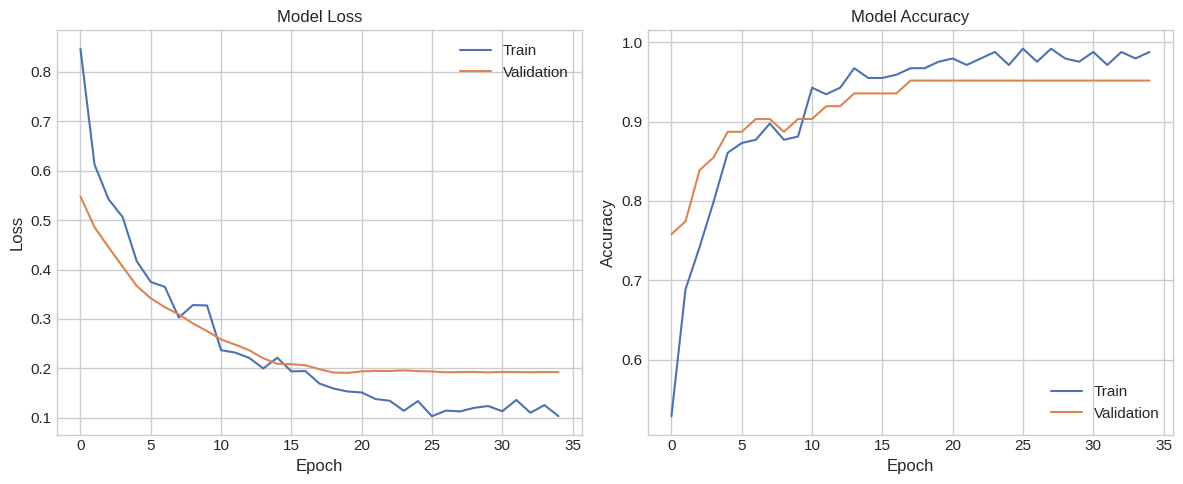

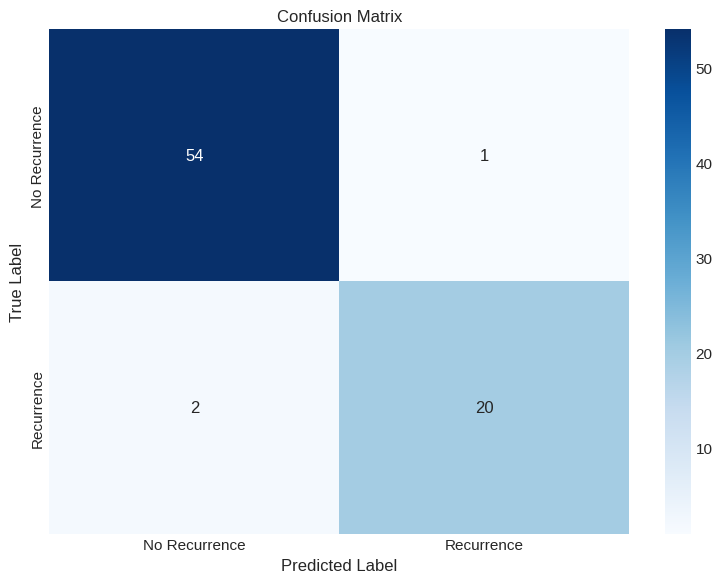


Combined Model Performance Comparison:
                 model  accuracy  precision    recall        f1   roc_auc
0  Logistic Regression  0.948052   0.950000  0.863636  0.904762  0.991736
1        Random Forest  0.974026   1.000000  0.909091  0.952381  0.990083
2              XGBoost  0.961039   0.952381  0.909091  0.930233  0.995868
3                  KNN  0.961039   0.952381  0.909091  0.930233  0.971074
4       Neural Network  0.961039   0.952381  0.909091  0.930233  0.990083


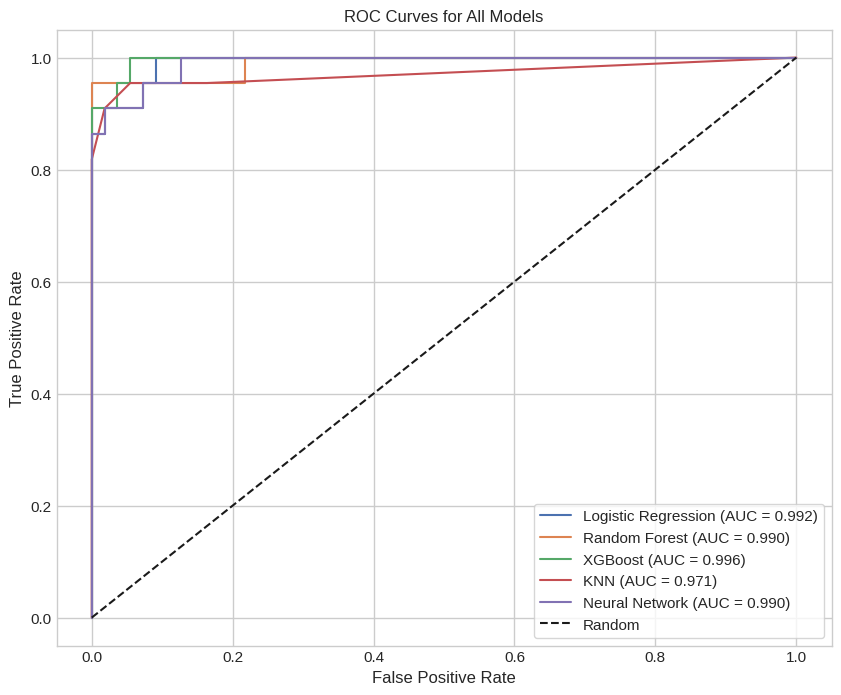

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#plot loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.set_title('Model Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Validation'], loc='upper right')

#plot accuracy
ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.set_title('Model Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Validation'], loc='lower right')
plt.tight_layout()
plt.show()

#Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['No Recurrence', 'Recurrence'],
           yticklabels=['No Recurrence', 'Recurrence'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

#model comparison
fnn_results = pd.DataFrame([{
    'model': 'Neural Network',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1': f1,
    'roc_auc': roc_auc
}])

combined_results = pd.concat([results_df, fnn_results], ignore_index=True)
print("\nCombined Model Performance Comparison:")
print(combined_results)

#ROC Curve
fnn_model_results = {
    'pred': y_pred,
    'prob': y_pred_prob
}
models['Neural Network'] = fnn_model_results

plt.figure(figsize=(10, 8))

for name, model_results in models.items():
    if 'prob' in model_results:
        fpr, tpr, _ = roc_curve(y_test, model_results['prob'])
        model_auc = roc_auc_score(y_test, model_results['prob'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {model_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(frameon=True)
plt.grid(True)
plt.savefig('combined_roc_curves.png')
plt.show()


Overall, the Feedforward Neural Network (FNN) performs well and it is highly competitive in terms of ability but, it falters in areas where the other models seem to do better. What holds it back, particularly, is the size of the dataset. Neural networks typically require a large dataset in order to perform better and exceed the performance of machine learning models. Despite this limitation, the FNN's relatively high performance stats makes it still a valuable model as it offers a different approach to prediction and analysis.

# **Prediction Function**

Using the best model, create a user function for entering a patient's stat will allow for prediction of tyroid cancer recurrence.

**Function**

In [107]:
def predict_thyroid_recurrence(rf_model, scaler):
  # predict recurrence using trained rf model
  # only asking for features that are considered significant

  print("Please enter the patient's details (Case Sensitive!):")

  #get user input
  user_data = {}
  user_data['Age'] = int(input("Age (years): "))

  categorical_options = {
      'Gender': ['F', 'M'],
      'Hx Smoking': ['No', 'Yes'],
      'Physical Examination': ['Multinodular goiter', 'Single nodular goiter-right', 'Single nodular goiter-left', 'Normal', 'Diffuse goiter'],
      'Adenopathy': ['No', 'Right', 'Bilateral', 'Left', 'Extensive', 'Posterior'],
      'Pathology': ['Papillary', 'Micropapillary', 'Follicular', 'Hurthel cell'],
      'Risk': ['Low', 'Intermediate', 'High'],
      'T': ['T1a','T1b','T2','T3a','T3b','T4a','T4b'],
      'N': ['N0','N1a','N1b'],
      'Stage': ['I','II','III','Advanced Stage IV'],  # collapsed IV
      'Response': ['Excellent','Structural Incomplete','Indeterminate','Biochemical Incomplete']
  }

  # gather inputs
  for feature, options in categorical_options.items():
      while True:
          value = input(f"{feature} {options}: ").strip()
          if value in options:
              user_data[feature] = value
              break
          print(f"Invalid input. Choose from {options}")

  #manually encode each feature based on training columns
  user_encoded = {'Age': float(user_data['Age'])}

  def add_column(col_name, condition):
      if col_name in training_columns:
          user_encoded[col_name] = 1.0 if condition else 0.0

  # Gender
  add_column('Gender_M', user_data['Gender'] == 'M')
  # Hx Smoking
  add_column('Hx Smoking_Yes', user_data['Hx Smoking'] == 'Yes')
  # Physical Examination
  for val in ['Multinodular goiter','Normal','Single nodular goiter-left','Single nodular goiter-right','Diffuse goiter']:
      add_column(f'Physical Examination_{val}', user_data['Physical Examination'] == val)
  # Adenopathy
  for val in ['No','Right','Bilateral','Left','Extensive','Posterior']:
      add_column(f'Adenopathy_{val}', user_data['Adenopathy'] == val)
  # Pathology
  for val in ['Papillary','Micropapillary','Follicular','Hurthel cell']:
      add_column(f'Pathology_{val}', user_data['Pathology'] == val)
  # Risk
  for val in ['Low','Intermediate','High']:
      add_column(f'Risk_{val}', user_data['Risk'] == val)
  # T
  for val in ['T1a','T1b','T2','T3a','T3b','T4a','T4b']:
      add_column(f'T_{val}', user_data['T'] == val)
  # N
  for val in ['N0','N1a','N1b']:
      add_column(f'N_{val}', user_data['N'] == val)
  # Stage (collapsed)
  for val in ['I','II','III','Advanced Stage IV']:
      add_column(f'Stage_{val}', user_data['Stage'] == val)
  # Response
  for val in ['Excellent','Indeterminate','Structural Incomplete','Biochemical Incomplete']:
      add_column(f'Response_{val}', user_data['Response'] == val)

  #fill in missing columns with 0
  for col in training_columns:
      if col not in user_encoded:
          user_encoded[col] = 0.0

  # convert to df and order cols
  user_df = pd.DataFrame([user_encoded])
  user_df = user_df[training_columns]

  #Scale features
  user_scaled = scaler.transform(user_df)

  #predict
  prob = rf_model.predict_proba(user_scaled)[0][1]
  pred_class = rf_model.predict(user_scaled)[0]

  #risk interpretation
  if prob < 0.3:
      risk_level = "Low risk"
  elif prob < 0.7:
      risk_level = "Moderate risk"
  else:
      risk_level = "High risk"

  print("\n--- Prediction Results ---")
  print(f"Predicted recurrence: {'Yes' if pred_class == 1 else 'No'}")
  print(f"Probability of recurrence: {prob:.2f}")
  print(f"Risk level: {risk_level}")


predict_thyroid_recurrence(rf_model, scaler)

Please enter the patient's details:
Age (years): 21
Gender ['F', 'M']: M
Hx Smoking ['No', 'Yes']: Yes
Physical Examination ['Multinodular goiter', 'Single nodular goiter-right', 'Single nodular goiter-left', 'Normal', 'Diffuse goiter']: Multinodular goiter
Adenopathy ['No', 'Right', 'Bilateral', 'Left', 'Extensive', 'Posterior']: Bilateral
Pathology ['Papillary', 'Micropapillary', 'Follicular', 'Hurthel cell']: Hurthel cell
Risk ['Low', 'Intermediate', 'High']: High
T ['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b']: T4b
N ['N0', 'N1a', 'N1b']: N1b
Stage ['I', 'II', 'III', 'Advanced Stage IV']: Advanced Stage IV
Response ['Excellent', 'Structural Incomplete', 'Indeterminate', 'Biochemical Incomplete']: Structural Incomplete

--- Prediction Results ---
Predicted recurrence: Yes
Probability of recurrence: 0.94
Risk level: High risk


Additional Resource: https://www.cancerresearchuk.org/about-cancer/thyroid-cancer/stages-types/tnm-staging

# **Conclusion**

**Executive Summary**

In this study, the key factors associated to thyroid cancer recurrence were identified through the data of 383 thyroid cancer patients. Factors strongly linked to recurrence include the male gender, smoking history, advanced TNM stages, high risk classification, having poor treatment responses, and certain pathological subtypes. Evaluated predictive models—particularly the Random Forest and XGBoost model—were able to achieve high levels of accuracy, allowing for risk assessing patient-specific recurrence cases. With the user-facing functionality, it enables users to input patient data and interact with the study's best performing predictive model, the Random Forest model. These findings support strategies such as early intervention and targeted monitoring in the thyroid cancer field.

---

**Study Report**

Through this study of 383 thyroid cancer patients, things such as key clinical, demographic, and pathological factors that associated with recurrence were identified. With this dataset of 17 different features relating to patient demographics, clinical history, pathology, and treatment response, identified factors were used to develop predictive models. Utilizing the patient information, these models were able to assess the probability of thyroid cancer recurrence with a high degree of accuracy and precision. As for why this is important: The ability to predict recurrence is a vital aspect of patient monitoring, risk classification, and customizing treatment plans for individual patients. In the realm of healthcare, patient recovery rates could be improved and the methodology of treatments could be reassessed if previously thought factors turns out to not be as significant as one may have thought in the past.

Going into the some key findings found while learning and understanding the dataset. There was a skew in gender distribution (312 females vs 71 males) which aligns with common medical knowledge that thyroid cancer is more common in females. We also noticed that smoking prevalence was low—same as history of prior radiotherapy. These pieces of information, in the case of this study, suggests that they may be a rarer risk factor. Most of the patients were euthyroid with papillary thyroid being the most common and micropapillary being second. In terms of tumor characteristics, the most common were unifocal, T2, N0 (no lymph node involvement), and metastases level M0. To put it into words "The tumor is within the thyroid between 2cm-4cm, cancer hasn't spread to nearby lymph nodes, and cancer hasn't spread to other parts of the body." In addition, Stage I and low-risk classifications were the most common. Most importantly, 28.2% of the patients experienced recurrence and as such, this is a clinically significant proportion. Overall, the characteristics of this dataset reflect the distributions found in the real world. It allows for the study to properly proceed into interpreting the patterns tracing to recurrence.

Through graphical analysis of each patient factor and its relationship with recurrence, there were uncovered trends that should be highlighted. With the gender ratio in mind, male patients turned out to have higher recurrence rates than females. This points to the potential of gender being an independent risk factor for thyroid cancer recurrence. Smoking, both current and history of it, associated with a higher recurrence. Same with having a history of radiotherapy, though we have to keep in mind that the sample size was small. Advanced stages of TNM, having high-risk classification, poor treatment response, and certain pathologies (follicular carcinoma) are all strongly linked to recurrence. Both papillary and Hürthle Cell carcinomas showed only a moderate association to recurrence while micropapillary had nearly no association.

In order to confirm whether or not a certain feature was significance, statistical analysis had to take place in this study. For age, with graphical interpretation, the Shapiro-Wilk test, and finally through the Mann-Whitney U test, it was confirmed to have statistical significance. It was understood that the distribution was non-normal and hence, T-test was not suffice enough to confirm this. As for categorical variables, with Chi-square, Fisher, and Fisher-Freeman-Halton Exact tests, all major factors showed statistical significance except thyroid functions. Visual observations in the previous steps supported the results of these statistical testing. The final result of these tests gives us this set of features found to be significant: "Gender, Smoking, Hx Smoking, Hx Radiotherapy, Physical Examination, Adenopathy, Pathology, Focality, Risk, T, N, M, Stage, Response, Age".

Prior to modeling, a process known as feature selection must be done. Feature selection entails selecting all the important features and variables that the models will take into consideration. Too much and predictive power are muddled; too little and the results will inaccurate. With that in mind, this is a crucial step when designing models. In this study, two methods were used for a comparison of differing approach: AdaBoost (tree-based) and LASSO (L1 regularization). The results of these two methods were then compared to find commonalities and differences. The final features used in the models included all of the important variables that both methods identified. The rationale for this decision stems from how both feature selection models work. AdaBoost utilizes decision trees which measure importance by training a decision tree with a small subset of data and then use the results of that tree as an input to improve upon the errors for the next tree. LASSO uses a mathematical principle know as L1 regularization. What the model does is essentially reduce the importance of less important features to zero until only the best features are left. This is done with the aim of not overfitting data. As such, it is understood that both model have different outputs as AdaBoost focus more on the specifics whereas LASSO gives a more broad look. Including both overlapping and distinct features allows for the eventual models to have more robust decision making power. The only feature difference were Adenopathy and Hx Smoking and so the features from the results of feature selection are: "Age, Gender, Hx Smoking, Thyroid Function, Physical Examination, Adenopathy, Pathology, Risk, T, N, Stage, Response". With this set of features, we have to review the results of the statistical analysis. The one feature that was found to be statistically insignificant to recurrence was Thyroid function. As such, it will not be included in the final selected features that will be used in the models. The resulting final selected features that will be included are: "Age, Gender, Hx Smoking, Physical Examination, Adenopathy, Pathology, Risk, T, N, Stage, Response".

With everything setup, the predictive models are now at hand. In this study, four different models were utilized for comparative analysis. These models were Logistic Regression, Random Forest, Gradient Boost (XGBoost), and K-Means (KNN). In order to properly assess these models and compare the performance of them against each other, five different metrics of evaluation were used: Accuracy, Precision, Recall, F1, and ROC-AUC. Accuracy is the proportion of correctly predicted cases from all the cases. Precision is the proportion of correct cases out of all patients predicted to be recurrent. Recall is proportion of correctly predicted cases out of all actual recurrent patient. F1 is the average of precision and recall. ROC-AUC is a value between 0 and 1 indicative of the area under the curve that measures and compares the model's True Positive rate and False Positive Rate. To touch on the implications of false positives and negatives, both have consequences in the real-world. With a false positive assessment, this can lead to unnecessary treatments and hence, medical costs on both parties—patient and hospital. With a false negative assessment, it could lead to patients not receiving much needed treatment and potentially delay patient care resulting in conditions worsening. With this in context, assessing the performance can be done with clear reasoning. All four models performed with strong metrics. The accuracy range was 0.948-0.974 and the ROC-AUC range was 0.971-0.995. Both the Random Forest and XGBoost were the top performing models.

With classical machine learning models utilized, to further explore different approaches to prediction and analysis, a Feedforward Neural Network model was benchmarked against the same evaluation techniques as the previous models. By examining the confusion matrices, the ROC curves, and the performance metrics, all five different models could be compared. The Feedforward Neural Network performed at a high level. It was highly competitive in terms of ability but, it was the Random Forest model that came out on top. The FNN likely faltered due to the sheer necessity of neural networks requiring vast amounts of data in order to perform and exceed the capabilities of machine learning models. Despite this limitation, the FNN still had high performance and it situates itself as a valuable model due to a different methodology for analysis. With that, the best model, in terms of performance, was the Random Forest model. It had the best metrics in four out of the five metrics and it offers the most balanced performance statistics out of all the models.

For applicational purposes, a prediction function was created using the best model, Random Forest. The function allows for the user to input a patient's data and it will run it through the model and predict recurrence as well as its exact probability. Two sample scenarios used for testing were as follows: Patient 1: [Age 21, Male, History of smoking, Multinodular goiter, Bilateral adenopathy, Hürthle cell pathology, High risk, T4b stage, N1b stage, Advanced Stage IV, Structural Incomplete response] Patient 2: [Age 30, Female, No smoking history, Normal examination, Adenopathy No, Follicular pathology, Low risk, T1a stage, N0 stage, Stage II, Excellent response]. The prediction for patient 1 is that there will be recurrence. The probability of recurrence is 94% indicating high risk. For patient 2, it is predicted that there will be no recurrence. The probability of recurrence is at 3% meaning the patient is at a low level of risk for recurrence. Creating the function demonstrates the practicality of predictive models in risk assessment for patient care purposes.  Though, not as the final executor of directives, these models can assist our health care workers and prevent unnecessary costs or suffering. Integration of modern predictive techniques supports better clinical decision-making.

In order to be thorough, this study must acknowledge some limitations. As the dataset isn't overly robust or as large as a medical network may see, it may limit the generalizability of the models, especially for neural networks. In addition, there were some features, such as Hx Radiotherapy, with very small sample sizes. With those cases, the statistical conclusions should be interpreted with caution. As with any real-world applications, there may be unobserved variables that aren't fully captured in the dataset. This is all to preface that each individual person or party should conduct their own research when using the results of this study in a real-world application.

To note some recommendations, future work that could be done is—first and foremost—include utilizing a larger scale dataset for better model ability, particularly for neural networks. Not only could it involve a larger dataset, more features, such as genetic or molecular markers, could be measured for better understanding of thyroid cancer and cell interactions. Expanding on the domain of carcinoma knowledge, consider different methods of patient monitoring to better capture the aspect of time-to-recurrence. All of these details could be instrumental in future findings. The techniques and findings from this study lays the foundation for future discoveries
